In [ ]:
# area

In [ ]:
def area_grid(lat, lon):
    """
    Calculate the area of each grid cell
    Area is in square meters
    
    Input
    -----------
    lat: vector of latitude in degrees
    lon: vector of longitude in degrees
    
    Output
    -----------
    area: grid-cell area in square-meters with dimensions, [lat,lon]
    
    Notes
    -----------
    Based on the function in
    https://github.com/chadagreene/CDT/blob/master/cdt/cdtarea.m
    """
    from numpy import meshgrid, deg2rad, gradient, cos
    from xarray import DataArray

    xlon, ylat = meshgrid(lon, lat)
    R = 6371000

    dlat = deg2rad(gradient(ylat, axis=0))
    dlon = deg2rad(gradient(xlon, axis=1))

    dy = dlat * R
    dx = dlon * R * cos(deg2rad(ylat))
    

    area = dy * dx
    


    xda = DataArray(
        area,
        dims=["lat", "lon"],
        coords={"lat": lat, "lon": lon},
        attrs={
        "long_name": "area_per_pixel",
        "description": "area per pixel",
        "units": "m^2",
        },
    )
    return xda

area = area_grid(Brahney['lat'],Brahney['lon'])
area.sum().item()/1e14 # m2/1e14

In [3]:
18e6*30*18e2/(8*(90)**3)

166666.66666666666

/tmp/ipykernel_2244634/3016312312.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(Ref,fontsize=11)
/tmp/ipykernel_2244634/3016312312.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(Ref,fontsize=11)


Text(3.5, 40000, 'EF$_{TJD}$ theoretical limit = 12500')

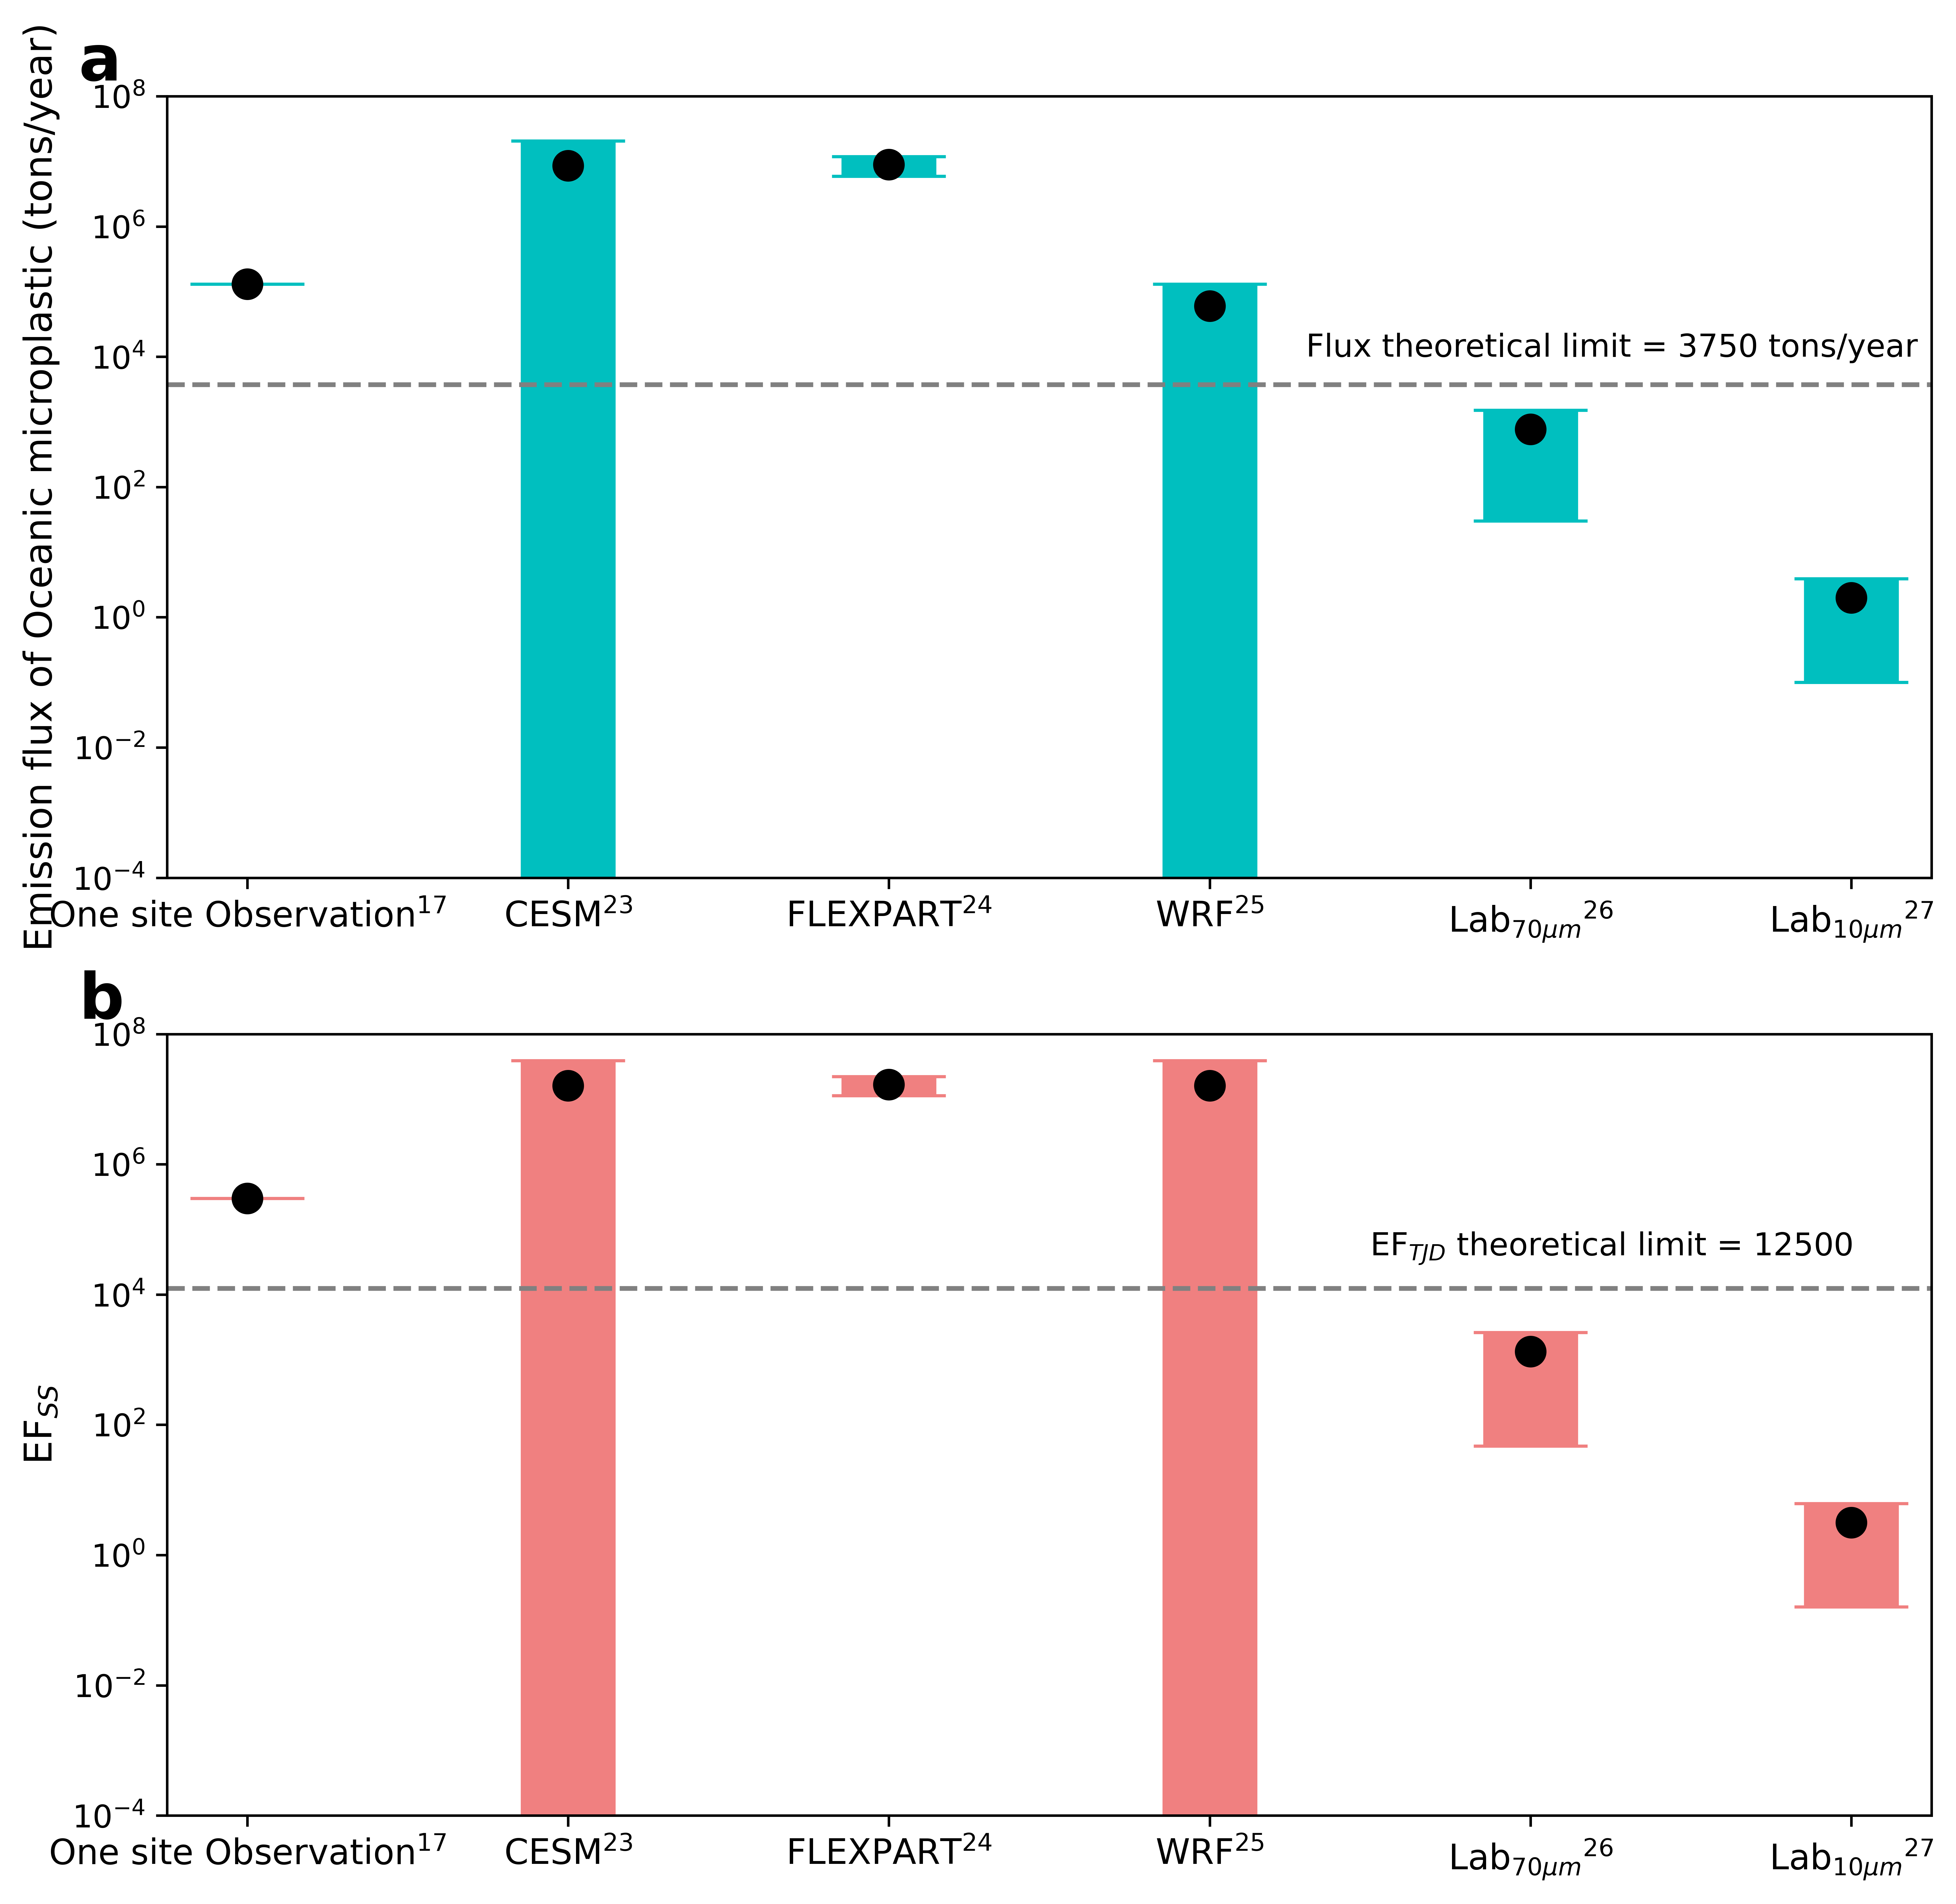

In [111]:
import matplotlib.pyplot as plt
import string

Ref = [r'One site Observation$^{17}$', r'CESM$^{23}$', r'FLEXPART$^{24}$', r'WRF$^{25}$','Lab$_{70μm}$$^{  26}$','Lab$_{10μm}$$^{  27}$']

EF = [3e5,1.62e7, 1.68e7,1.62e7,1337,3.16]
Flux=[0.13e6,8.6e6,8.9e6,0.06e6,770,2]
error_f = [0,12e6,3e6,0.07e6,740,1.9]
error = [0,2.3e7,5.45e6,2.3e7,1290,3]

fig, axes = plt.subplots(nrows=2,ncols=1,
                        figsize=(10,10),dpi=800)

axes[0].set_yscale("log")
axes[0].set_xticklabels(Ref,fontsize=11)
axes[0].set_ylim(1e-4, 1e8)
axes[0].set_ylabel(r'Emission flux of Oceanic microplastic (tons/year)',fontsize=12)
axes[0].text(-0.05, 1.02, string.ascii_lowercase[0], transform=axes[0].transAxes, 
            size=20, weight='bold')
axes[0].errorbar(Ref, Flux,error_f, fmt = 'o',markersize='9', color='black', ecolor='c',linewidth=30,capsize=18)
axes[0].axhline(y=3750,linestyle='--',color="grey")
axes[0].text(3.3,10000,'Flux theoretical limit = 3750 tons/year')

axes[1].set_yscale("log")
axes[1].set_ylim(1e-4, 1e8)
axes[1].set_xticklabels(Ref,fontsize=11)
axes[1].set_ylabel(r'EF$_{SS}$',fontsize=12)
axes[1].text(-0.05, 1.02, string.ascii_lowercase[1], transform=axes[1].transAxes, 
            size=20, weight='bold')
axes[1].errorbar(Ref, EF,error, fmt = 'o', markersize='9', color='black', ecolor='lightcoral',linewidth=30,capsize=18)
axes[1].axhline(12500,linestyle='--',color="grey")
axes[1].text(3.5,40000,r'EF$_{TJD}$ theoretical limit = 12500')

#plt.savefig("/home/m/m300814/python_code/image/perspective/perspective_f2.png")

/tmp/ipykernel_1240103/2828162397.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(Soils,fontsize=11)


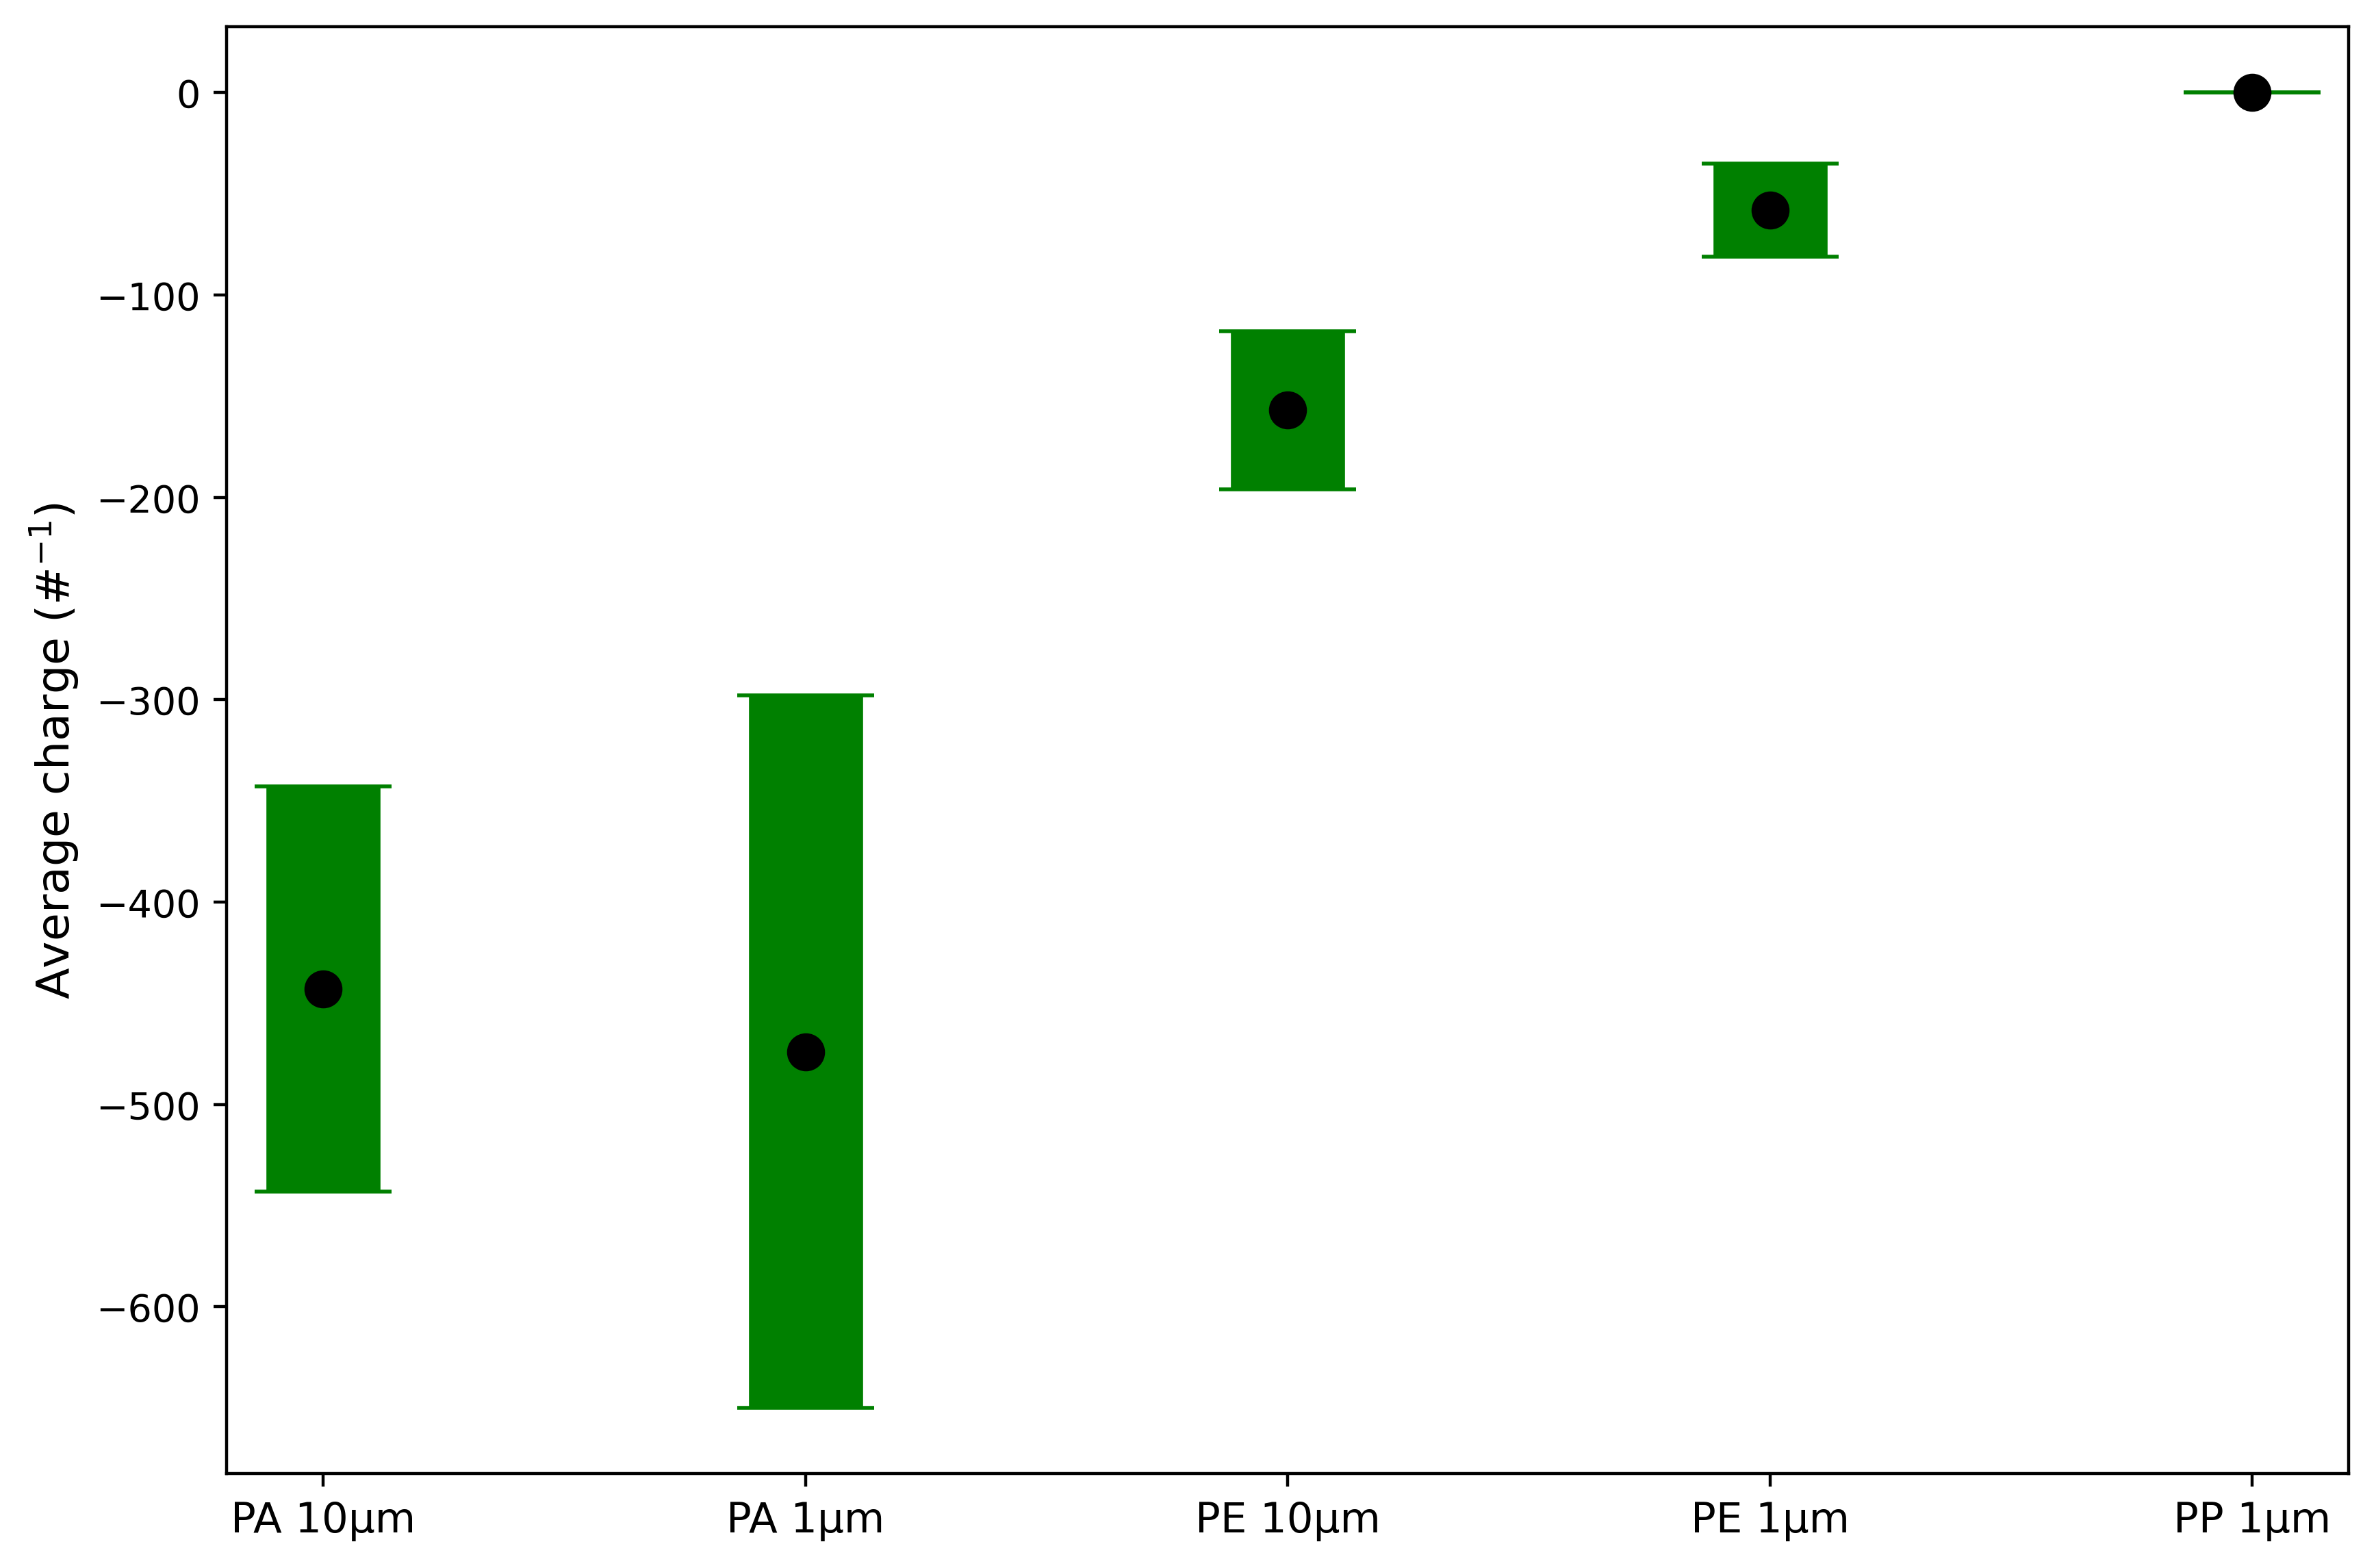

In [14]:
import matplotlib.pyplot as plt
import string

Soils= ['PA 10μm', 'PA 1μm', 'PE 10μm','PE 1μm','PP 1μm']
EF1 = [-443,-474,-157,-58,0]
error1 = [100,176,39,23,0]

fig, ax = plt.subplots(figsize=(10,7),dpi=400)

ax.set_xticklabels(Soils,fontsize=11)
ax.set_ylabel(r'Average charge (#$^{-1}$)',fontsize=12)

ax.errorbar(Soils, EF1,error1, fmt = 'o',markersize='9', color='black', ecolor='g',linewidth=30,capsize=18)

plt.savefig("/home/m/m300814/python_code/image/inventory/f1.png")

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 输入样本数据
X = np.array([[59, 1, 1], [30, 1, 1], [42, 3, 1]])  # 自变量，三个特征
y = np.array([[1, 0, 1, 0], [1, 1, 1, 0], [1, 1, 1, 1]])  # 因变量，四个目标变量

# 创建并拟合多元线性回归模型
model = LinearRegression()
model.fit(X, y)

# 打印模型的系数和截距
coefficients = model.coef_
intercept = model.intercept_
print("公式:")
for i in range(len(coefficients)):
    equation = "y" + str(i+1) + " = "
    for j in range(len(X[0])):
        equation += str(coefficients[i][j]) + " * x" + str(j+1) + " + "
    equation += str(intercept[i])
    print(equation)


公式:
y1 = 0.0 * x1 + 0.0 * x2 + 0.0 * x3 + 1.0
y2 = -0.03448275862068964 * x1 + 0.2068965517241379 * x2 + 0.0 * x3 + 1.8275862068965512
y3 = 0.0 * x1 + 0.0 * x2 + 0.0 * x3 + 1.0
y4 = 8.940791956852298e-19 * x1 + 0.5000000000000002 * x2 + 0.0 * x3 + -0.5000000000000004


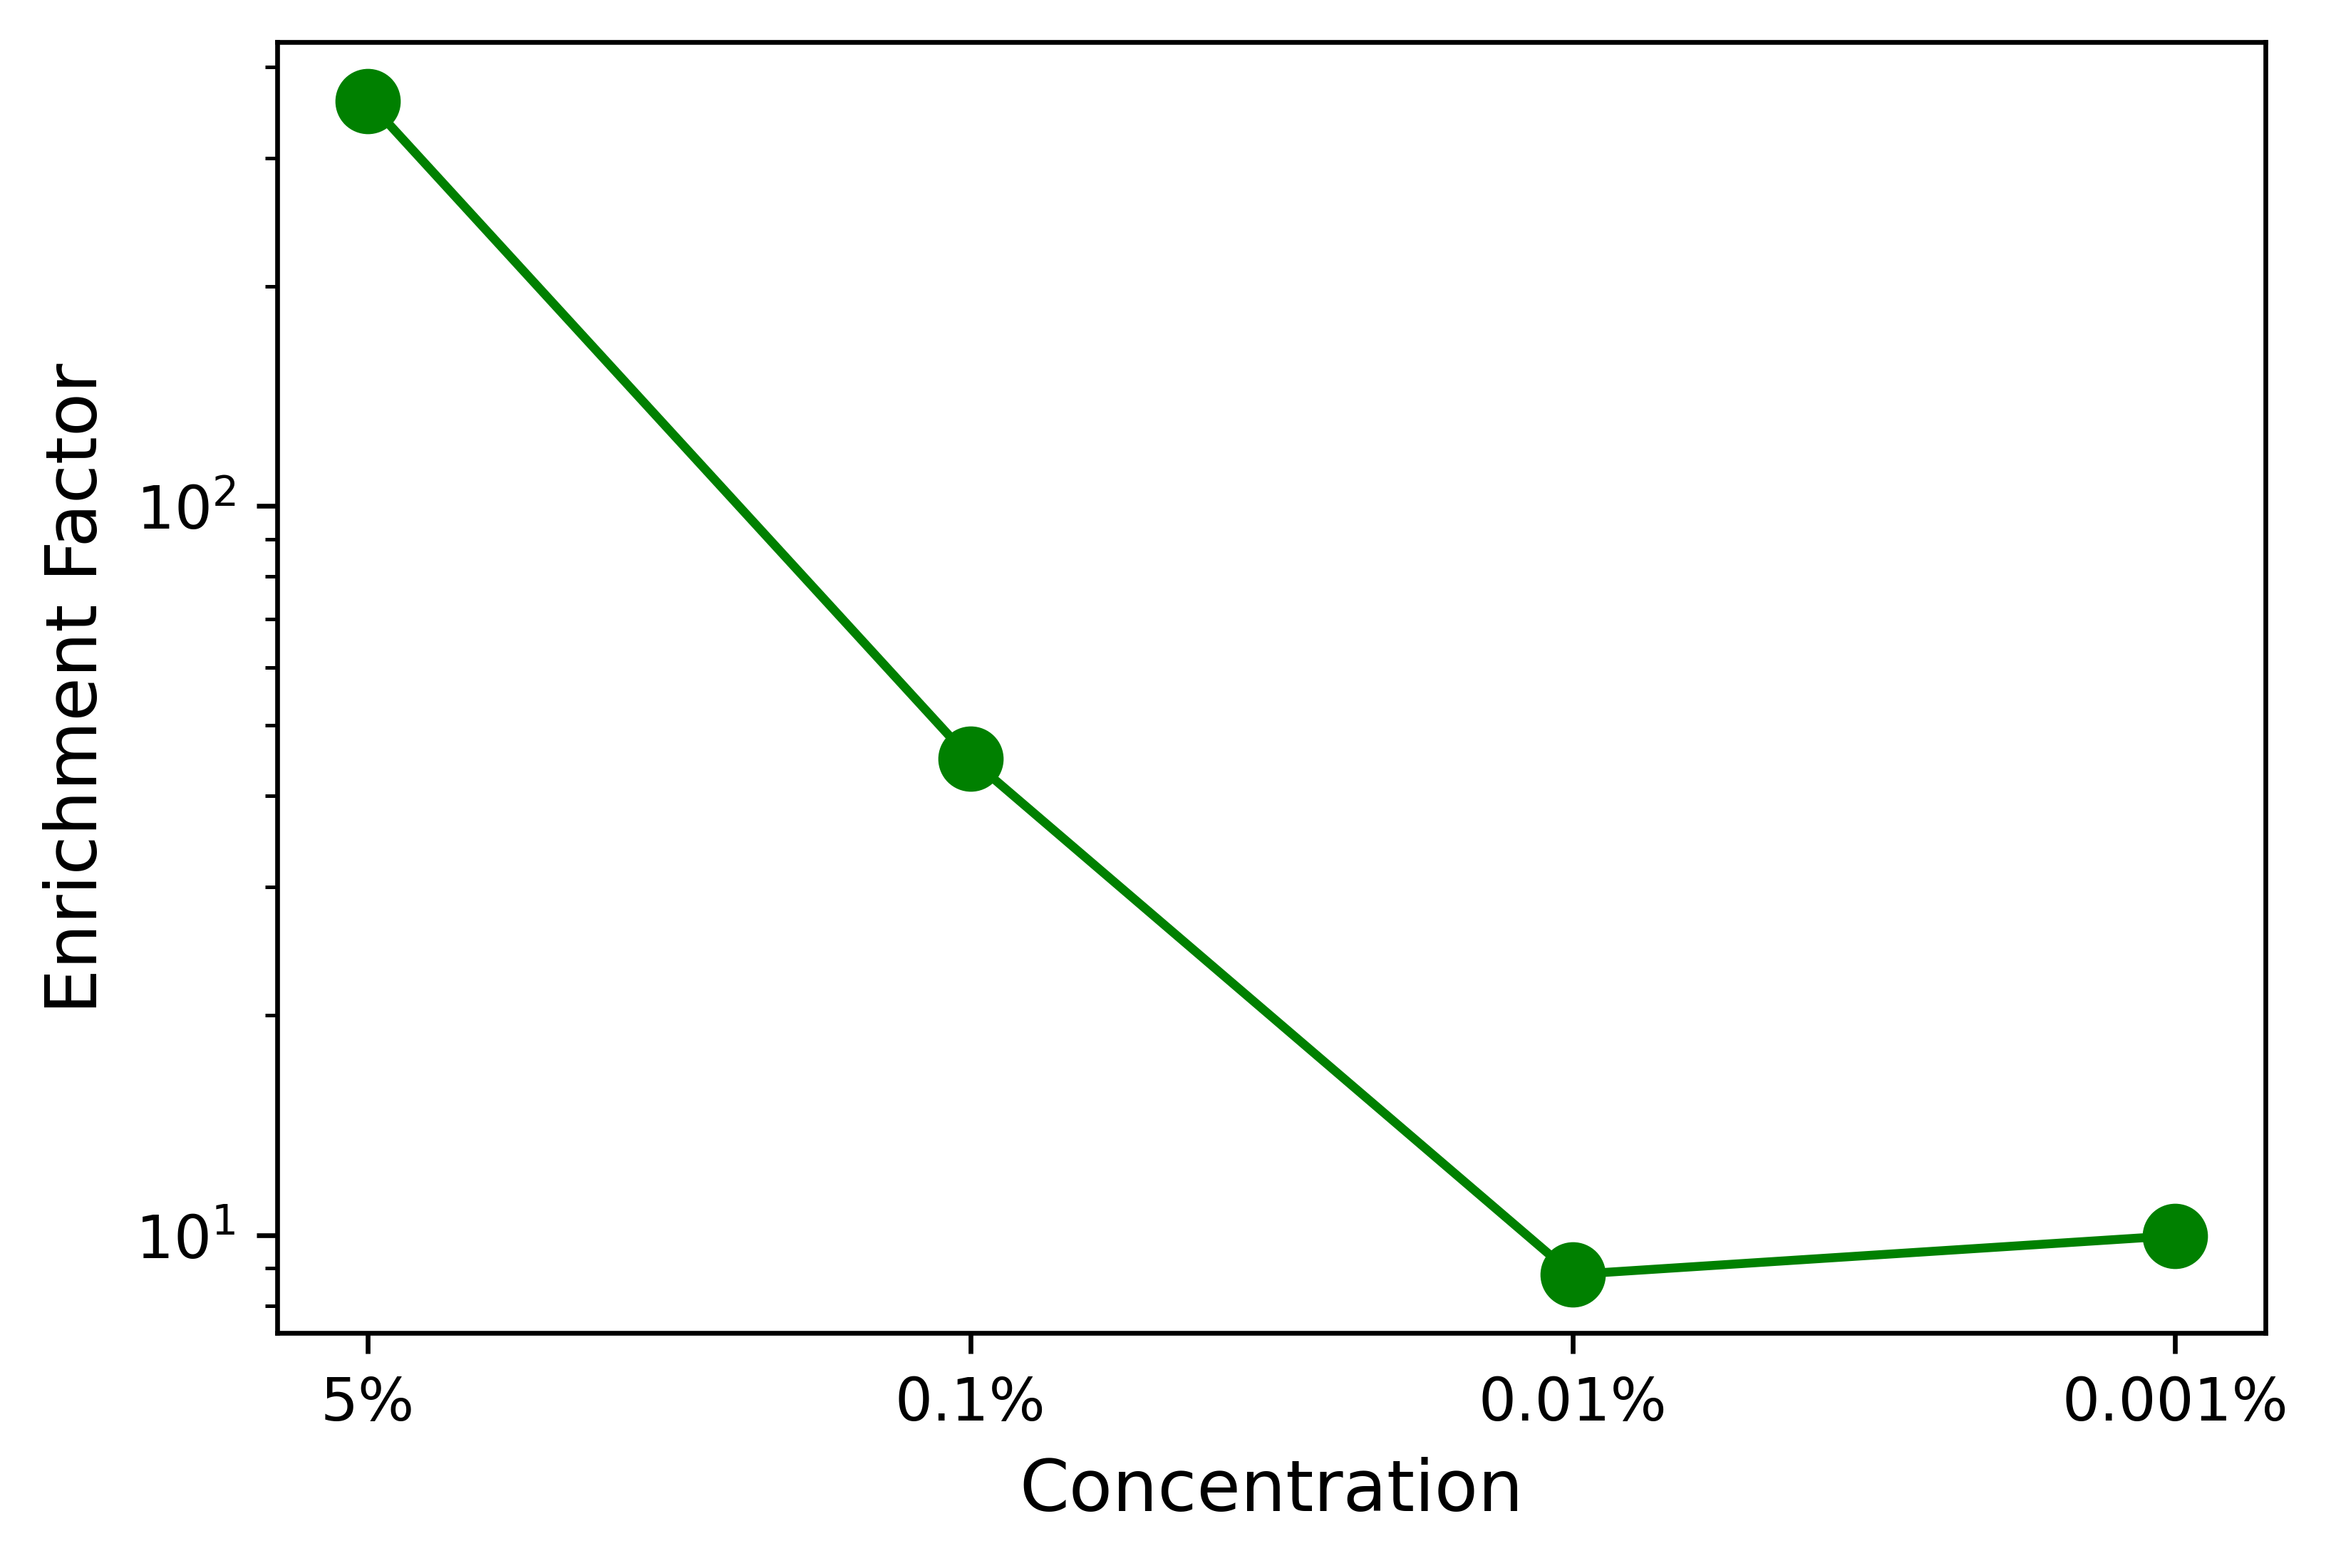

In [40]:
import numpy as np
from matplotlib import pyplot as plt
Concentration = ['5%','0.1%','0.01%',"0.001%"]
EF = [359,45,8.83,9.98]
plt.figure(dpi=600) 
plt.xticks(x,Concentration)
plt.semilogy(x,EF,color='green',marker='o',markersize='10')
plt.xlabel("Concentration",size='12'#,fontweight='bold'
          )
plt.ylabel("Enrichment Factor",size='12',#fontweight='bold'
          )
#plt.text(-0.7,1e8, 'a',
#            size=20, #weight='bold'
#        )
plt.show()
#plt.savefig('filename.png', dpi=300)

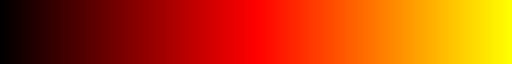

In [1]:
import matplotlib.colors
Bella2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","red","yellow"])
display(Bella2)

/tmp/ipykernel_924665/1267875350.py:32: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/tmp/ipykernel_924665/1267875350.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("hot_r")


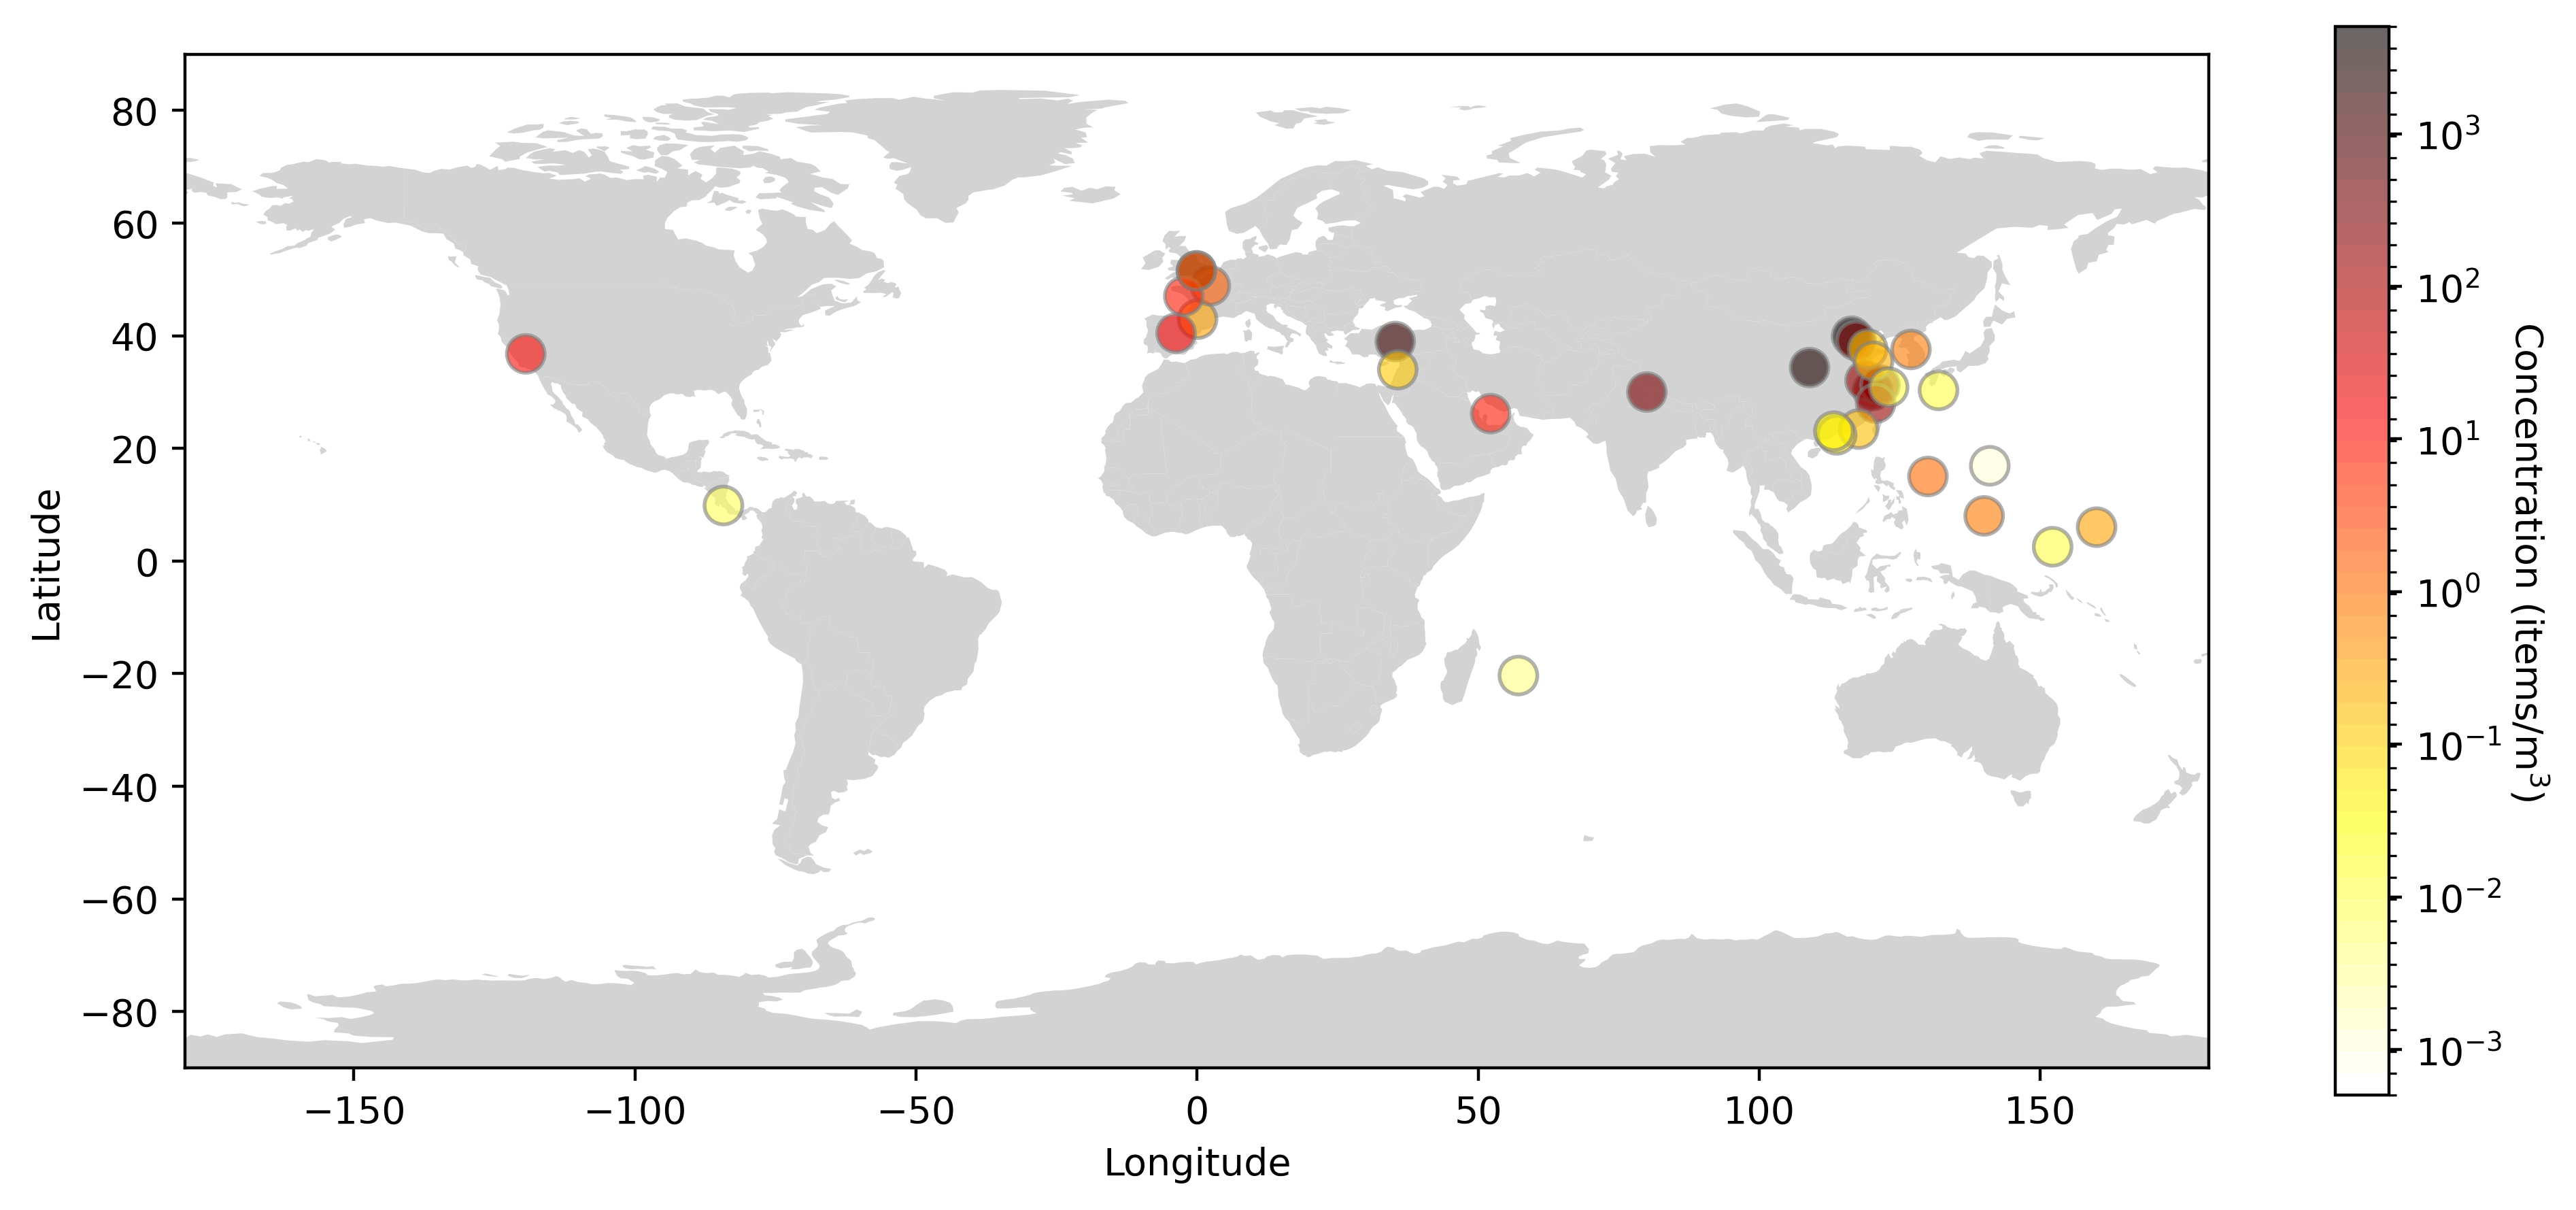

In [3]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import ScalarFormatter, FuncFormatter
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Location data
locations = [
    "Beijing", "Tianjin", "Hangzhou", "Nanjing", "Shanghai", 
    "Pic du Midi", "Paris", "California", "Spain", "Turkey", 
    "London", "Wenzhou", "Xian", "Persian Gulf", "French Atlantic", 
     "West Pacific", "Bohai Sea", "Yellow Sea", "East China Sea", 
    "South China Sea", "South China Sea", "North Atlantic", "Pearl River", "East Indian Ocean",
    'remote ','pelagic ','nearshore '," Tibetan Plateau"
    ,"S1","S2","S3",'Seoul','London'
]

# Concentration data
concentrations = [
    5778, 324, 246, 177, 267,
    0.3, 1.5, 12.6, 15, 1500, 
    2502, 150, 3500, 7,9, 
    0.01, 0.1, 0.2, 0.15, 
    0.05, 0.008, 0.1, 0.04, 0.004,
    0.001,0.01,0.01,263,
    1,0.8,0.3,0.7,1.5
]

# Get world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


# Latitude and Longitude data for locations
latitude = [
    39.9042, 39.1317, 30.2741, 32.0603, 31.2304,  
    42.9364, 48.8566, 36.7783, 40.4637, 38.9637, 
    51.5074, 28.0197, 34.3416, 26.1604, 47.0278,
     2.5218, 37.6486, 35.4607, 23.4241, 
    22.3964, 9.8484, 33.9722, 23.0469, -20.3484,
    16.9,30.3,30.85,30,
    15,8,6,37.5665,51.5
    
]

longitude = [
     116.4074, 117.1981, 120.1551, 118.7969, 121.4737, 
    0.0772, 2.3522, -119.4179, -3.7492, 35.2433, 
    -0.1276, 120.6994, 108.9402, 52.2083, -2.3641,
    152.1800, 119.2873, 120.3200, 117.6780, 
    113.7633, -84.2595, 35.6895, 113.2644, 57.1497,
    141,131.88,123,80,
    130,140,160,126.9780,-0.12
]


# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6),dpi=400)
worldmap.plot(color="lightgrey", ax=ax)

# Plotting cities on the map with color representing concentration
cmap = plt.cm.get_cmap("hot_r")
concentration_levels = np.logspace(np.log10(5e-4), np.log10(5e3), # num=7
                                  )
norm = BoundaryNorm(concentration_levels, ncolors=cmap.N, clip=True)

sc = plt.scatter(longitude, latitude, s=100, c=concentrations, alpha=0.6, cmap=cmap, norm=norm,edgecolors="grey")
cbar = plt.colorbar(sc, label='Concentration [items/m3]', format=ScalarFormatter(), ax=ax,shrink=0.85)
cbar.set_label('Concentration (items/m$^{3}$)', rotation=270)
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_coords(4, 0.5)

# Formatting the colorbar tick labels to display in the 10th power
tick_values = [10**3, 10**2, 10**1, 10**0, 10**-1, 10**-2, 10**-3]
cbar.ax.yaxis.set_ticks(tick_values)
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"$10^{{{int(np.log10(x))}}}$"))

# Creating axis limits and title
ax.set_xlim([-180, 180])
ax.set_ylim([-90, 90])
#ax.set_title("Microplastic Concentration in Different Locations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

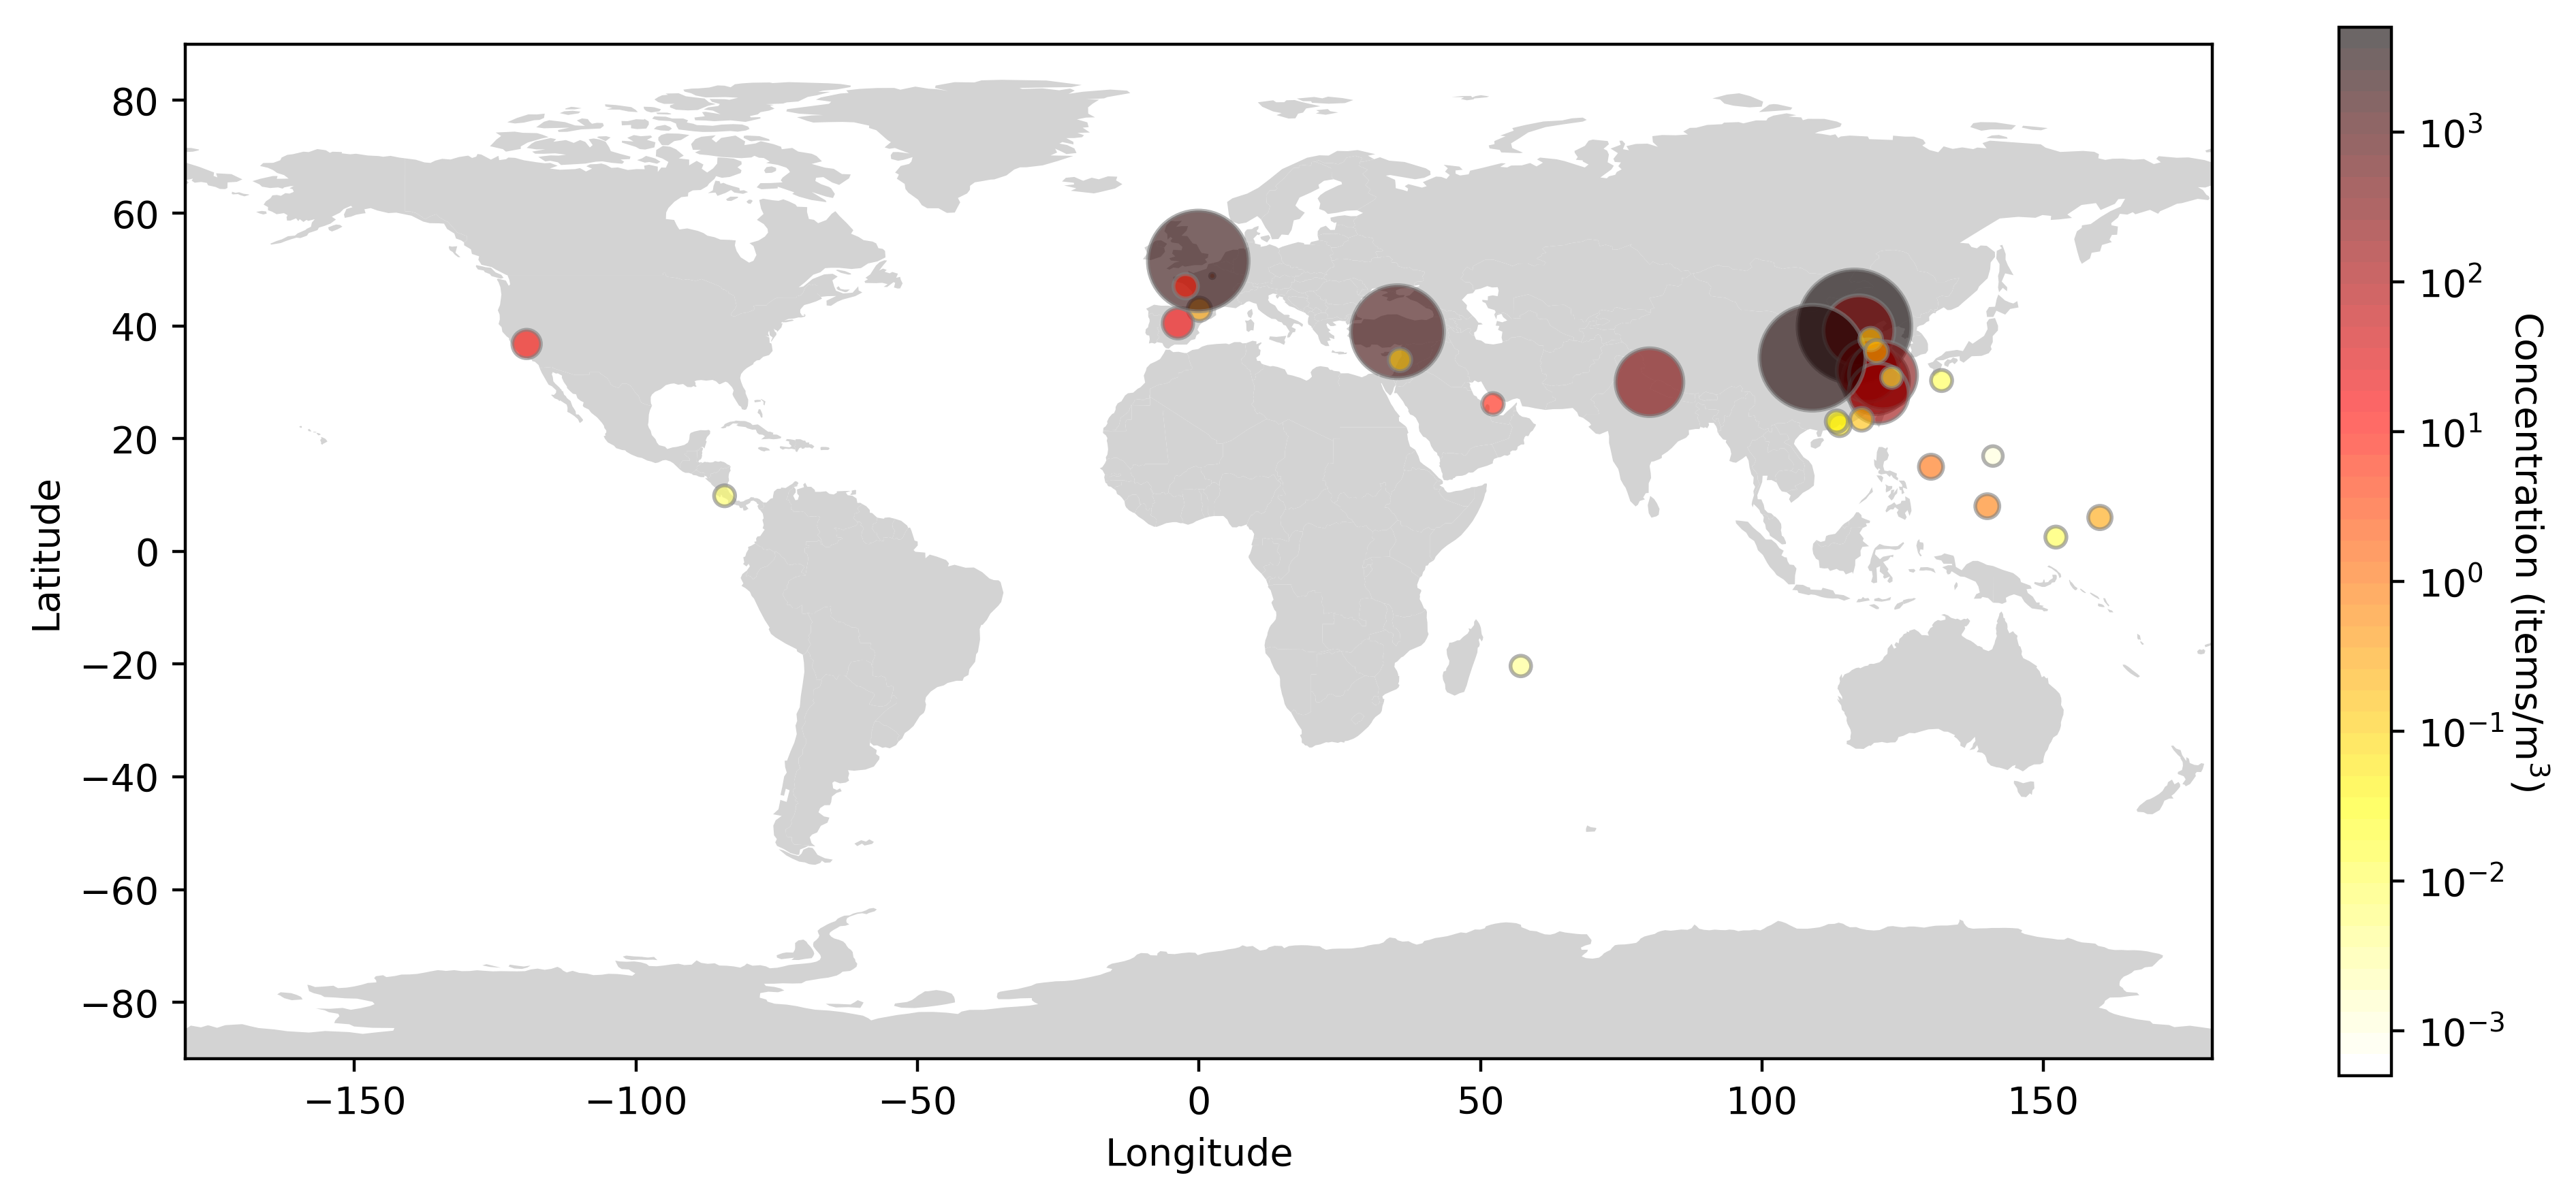

In [58]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import ScalarFormatter, FuncFormatter
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Location data
locations = [
    "Beijing", "Tianjin", "Hangzhou", "Nanjing", "Shanghai", 
    "Pic du Midi", "Paris", "California", "Spain", "Turkey", 
    "London", "Wenzhou", "Xian", "Persian Gulf", "French Atlantic", 
     "West Pacific", "Bohai Sea", "Yellow Sea", "East China Sea", 
    "South China Sea", "South China Sea", "North Atlantic", "Pearl River", "East Indian Ocean",
    'remote ','pelagic ','nearshore '," Tibetan Plateau"
    ,"S1","S2","S3"
]

# Concentration data
concentrations = [
    5778, 324, 246, 177, 267,
    0.3, 1.5, 12.6, 15, 1500, 
    2502, 150, 3500, 7,9, 
    0.01, 0.1, 0.2, 0.15, 
    0.05, 0.008, 0.1, 0.04, 0.004,
    0.001,0.01,0.01,263,
    1,0.8,0.3
]

# Get world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


# Latitude and Longitude data for locations
latitude = [
    39.9042, 39.1317, 30.2741, 32.0603, 31.2304,  
    42.9364, 48.8566, 36.7783, 40.4637, 38.9637, 
    51.5074, 28.0197, 34.3416, 26.1604, 47.0278,
     2.5218, 37.6486, 35.4607, 23.4241, 
    22.3964, 9.8484, 33.9722, 23.0469, -20.3484,
    16.9,30.3,30.85,30,
    15,8,6
    
]

longitude = [
     116.4074, 117.1981, 120.1551, 118.7969, 121.4737, 
    0.0772, 2.3522, -119.4179, -3.7492, 35.2433, 
    -0.1276, 120.6994, 108.9402, 52.2083, -2.3641,
    152.1800, 119.2873, 120.3200, 117.6780, 
    113.7633, -84.2595, 35.6895, 113.2644, 57.1497,
    141,131.88,123,80,
    130,140,160
]


# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6),dpi=400)
worldmap.plot(color="lightgrey", ax=ax)

# Plotting cities on the map with color representing concentration
cmap = plt.cm.get_cmap("hot_r")
concentration_levels = np.logspace(np.log10(5e-4), np.log10(5e3), # num=7
                                  )
norm = BoundaryNorm(concentration_levels, ncolors=cmap.N, clip=True)

min_marker_size = 50
max_marker_size = 700
#sizes = np.interp(concentrations, (1e-6, 1e4), (min_marker_size, max_marker_size))

sc = plt.scatter(longitude, latitude, s=si, c=concentrations, alpha=0.6, cmap=cmap, norm=norm,edgecolors="grey")
cbar = plt.colorbar(sc, label='Concentration [items/m3]', format=ScalarFormatter(), ax=ax,shrink=0.85)
cbar.set_label('Concentration (items/m$^{3}$)', rotation=270)
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_coords(4, 0.5)

# Formatting the colorbar tick labels to display in the 10th power
tick_values = [10**3, 10**2, 10**1, 10**0, 10**-1, 10**-2, 10**-3]
cbar.ax.yaxis.set_ticks(tick_values)
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"$10^{{{int(np.log10(x))}}}$"))

# Creating axis limits and title
ax.set_xlim([-180, 180])
ax.set_ylim([-90, 90])
#ax.set_title("Microplastic Concentration in Different Locations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

In [55]:
import numpy as np

concentrations = [
    5778, 324, 246, 177, 267,
    0.3, 1.5, 12.6, 15, 1500, 
    2502, 150, 3500, 7,9, 
    0.01, 0.1, 0.2, 0.15, 
    0.05, 0.008, 0.1, 0.04, 0.004,
    0.001,0.01,0.01,263,
    1,0.8,0.3
]
min_marker_size = 3
max_marker_size = 4
sizes = np.interp(np.log10(concentrations), (min(np.log10(concentrations)), max(np.log10(concentrations))), (min_marker_size, max_marker_size))

sizes

array([4.        , 3.81495509, 3.79726597, 3.77612333, 3.80252733,
       3.36634173, 3.46971247, 3.60640424, 3.61760258, 3.91338279,
       3.94624339, 3.76549269, 3.96780292, 3.56865196, 3.58479335,
       3.14789011, 3.29578021, 3.34029957, 3.32182237, 3.25126085,
       3.13355807, 3.29578021, 3.23692882, 3.08903872, 3.        ,
       3.14789011, 3.14789011, 3.80155783, 3.44367032, 3.42933829,
       3.36634173])

In [1]:
#Airborne and marine microplastics from an oceanographic survey at the Baltic Sea: An emerging role of air-sea interaction?

In [3]:
emission = 11e6 #4–18 ∗ 106 μm3 m−2 s−1 range
emission = emission / 1e18 # m3 m-2 s-1
emission = emission * 3600*24*365*360*1e6*1e6  #ton/year
#The total area of the Earth is approximately 510 million square kilometers and the oceans cover about 71 percent of the Earth's surface, which is about 360 million square kilometers
emission  # Global

124882560000.0

In [5]:
emission = 11e6 #4–18 ∗ 106 μm3 m−2 s−1 range
emission = emission / 1e18 # m3 m-2 s-1
emission = emission * 3600*24*365 *32*1e4*1e6/1e6  #Tg/year
#The total area of the Earth is approximately 510 million square kilometers and the oceans cover about 71 percent of the Earth's surface, which is about 360 million square kilometers
emission  # 波罗的海 Tg

111.00672

In [8]:
r=32*1e4/(360*1e6)
r

0.0008888888888888889

In [ ]:
#毕业论文用

/tmp/ipykernel_1122946/1988562765.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(Ref,fontsize=11)
/tmp/ipykernel_1122946/1988562765.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(Ref,fontsize=11)


Text(1.5, 40000, 'EnF$_{TJD}$ theoretical limit = 12500')

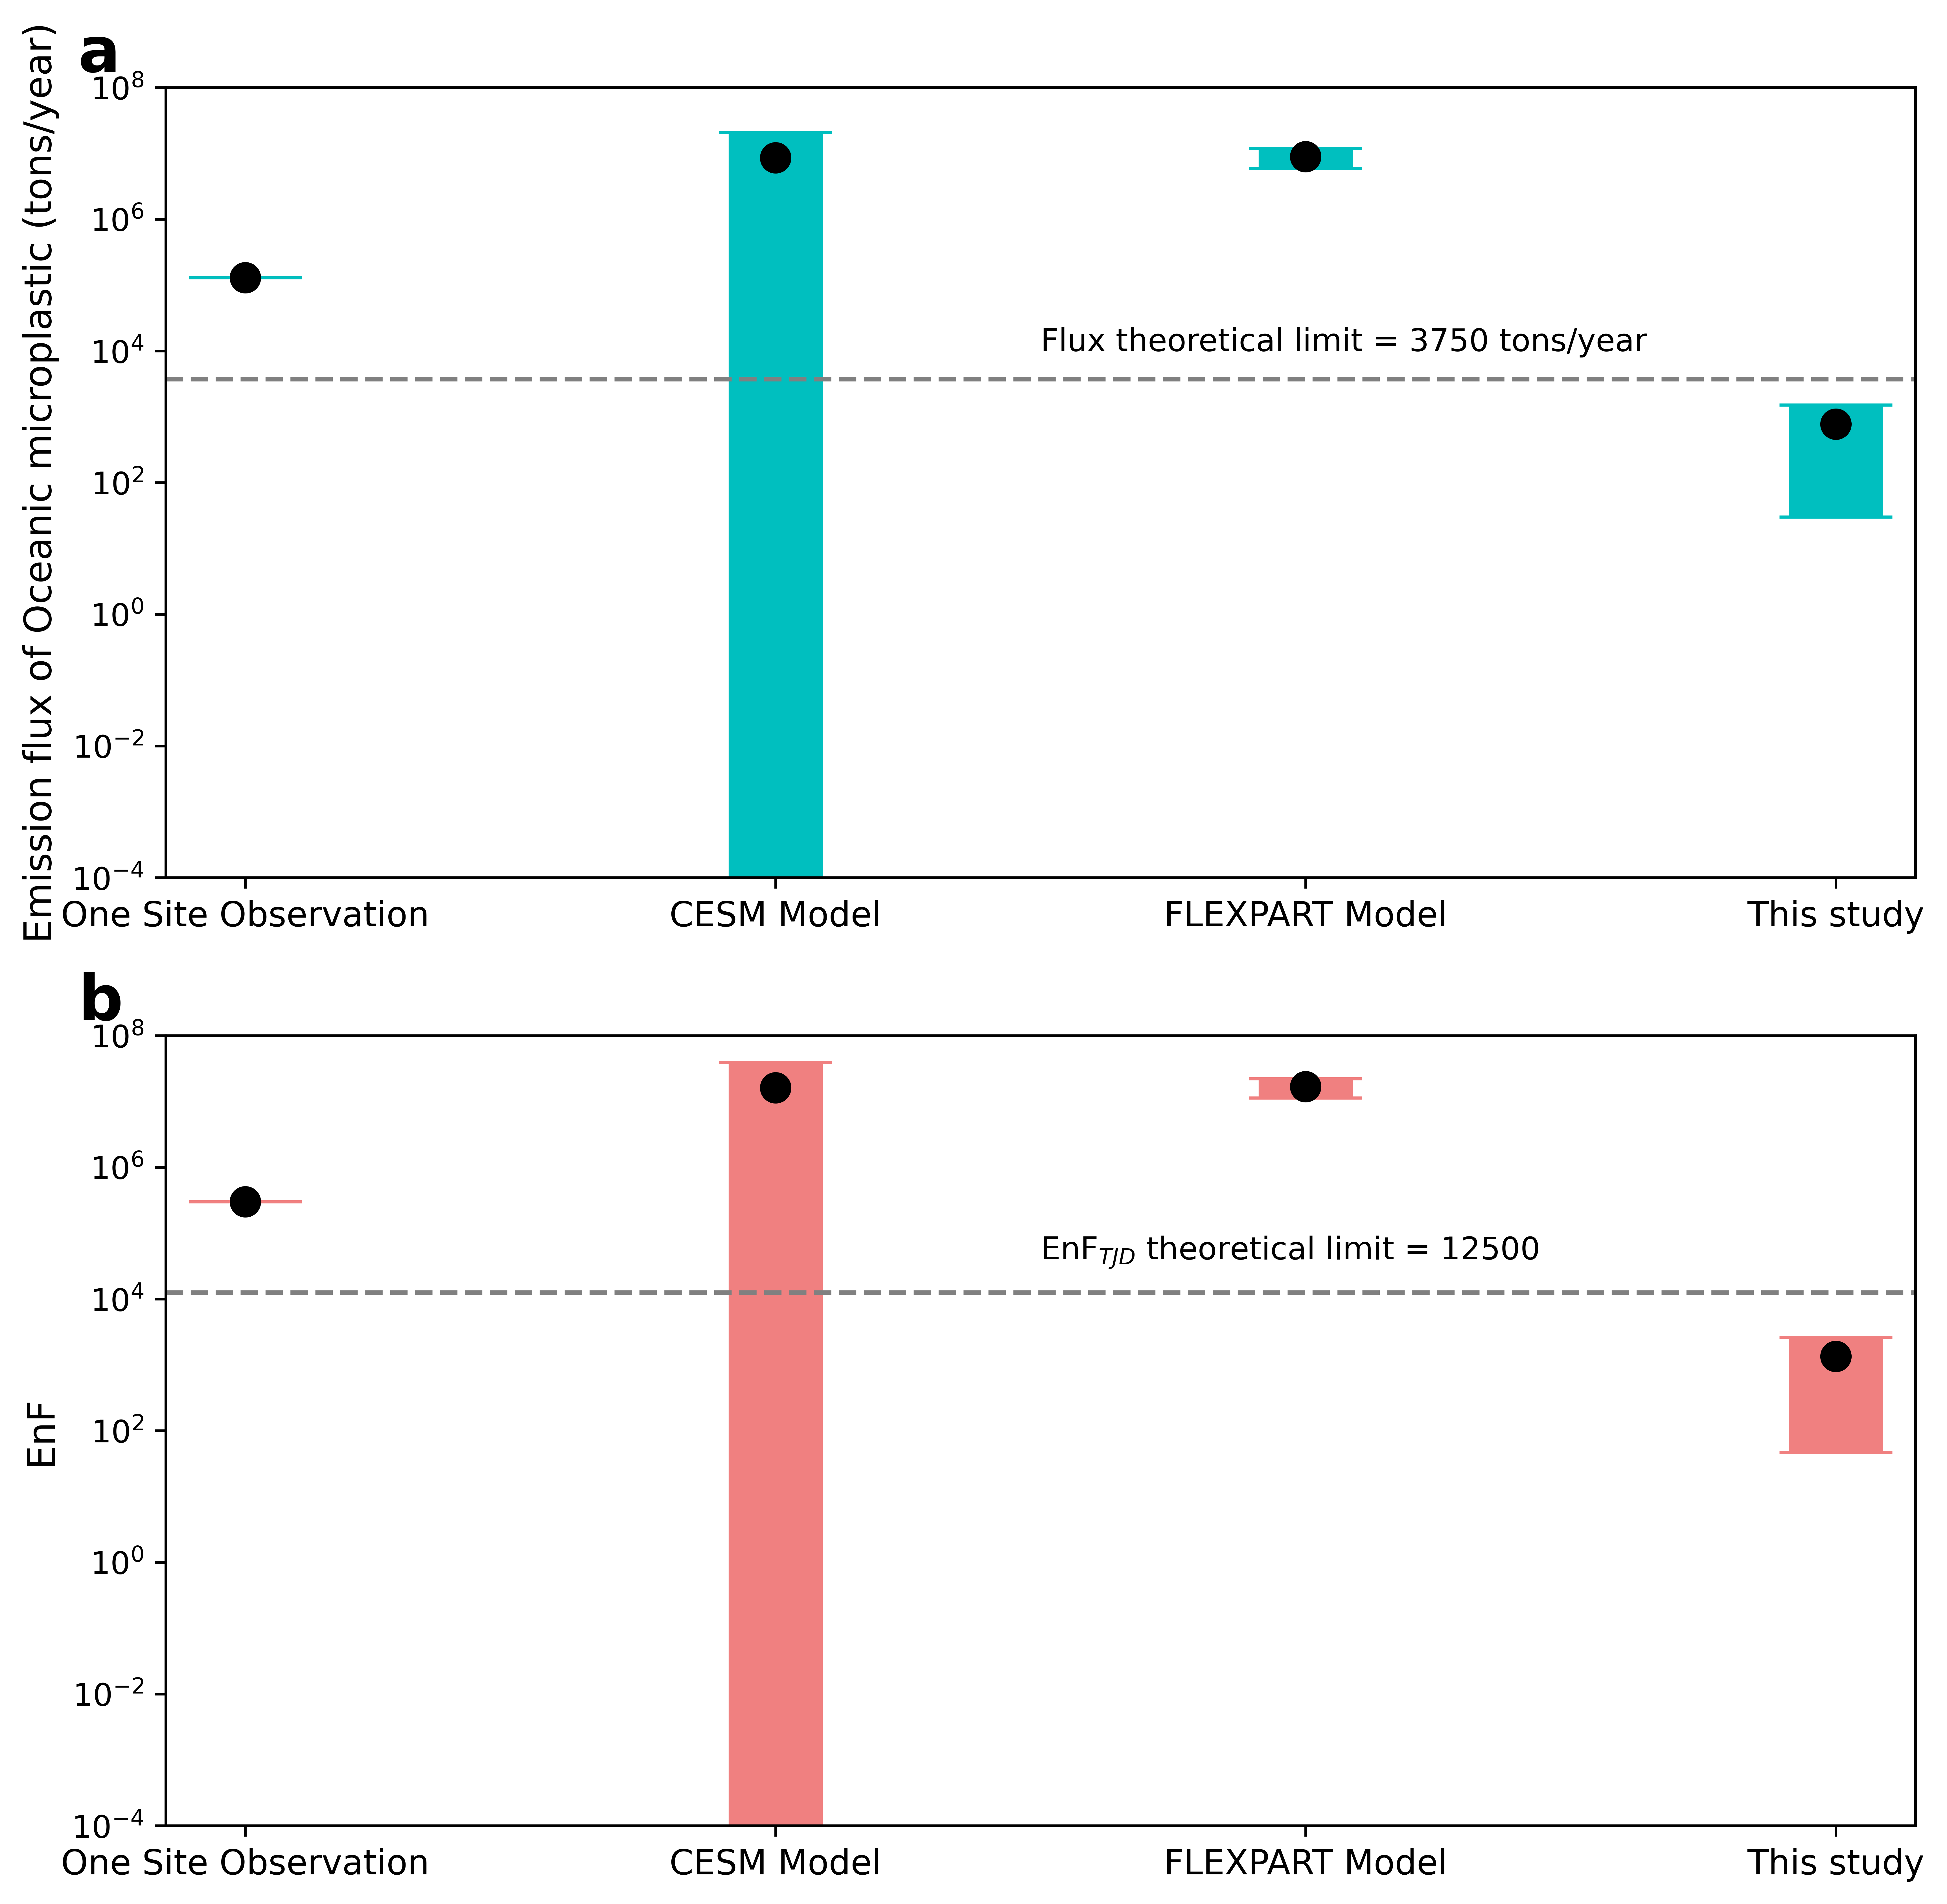

In [5]:
import matplotlib.pyplot as plt
import string

Ref = [r'One Site Observation', r'CESM Model', r'FLEXPART Model', 'This study']
EF = [3e5,1.62e7, 1.68e7,1337]

Flux=[0.13e6,8.6e6,8.9e6,770]
error_f = [0,12e6,3e6,740,]
error = [0,2.3e7,5.45e6,1290]

fig, axes = plt.subplots(nrows=2,ncols=1,
                        figsize=(10,10),dpi=800)

axes[0].set_yscale("log")
axes[0].set_xticklabels(Ref,fontsize=11)
axes[0].set_ylim(1e-4, 1e8)
axes[0].set_ylabel(r'Emission flux of Oceanic microplastic (tons/year)',fontsize=12)
axes[0].text(-0.05, 1.02, string.ascii_lowercase[0], transform=axes[0].transAxes, 
            size=20, weight='bold')
axes[0].errorbar(Ref, Flux,error_f, fmt = 'o',markersize='9', color='black', ecolor='c',linewidth=30,capsize=18)
axes[0].axhline(y=3750,linestyle='--',color="grey")
axes[0].text(1.5,10000,'Flux theoretical limit = 3750 tons/year')

axes[1].set_yscale("log")
axes[1].set_ylim(1e-4, 1e8)
axes[1].set_xticklabels(Ref,fontsize=11)
axes[1].set_ylabel(r'EnF',fontsize=12)
axes[1].text(-0.05, 1.02, string.ascii_lowercase[1], transform=axes[1].transAxes, 
            size=20, weight='bold')
axes[1].errorbar(Ref, EF,error, fmt = 'o', markersize='9', color='black', ecolor='lightcoral',linewidth=30,capsize=18)
axes[1].axhline(12500,linestyle='--',color="grey")
axes[1].text(1.5,40000,r'EnF$_{TJD}$ theoretical limit = 12500')

#plt.savefig("/home/m/m300814/python_code/image/perspective/perspective_f2.png")

In [6]:
423*100/0.015*0.0036

10152.0

In [5]:
12500*(0.015*8)

1500.0

In [11]:
#Bingqiang et al. 2022
EF1=300/8/0.015
EF2=423*100*0.0036/0.015/2
print(EF1,EF2)

2500.0 5076.0


In [2]:
data='''0.010363439	12458548.2	0.010363439	12458548.2
0.015347813	29436117.23	0.015347813	29436117.23
0.024411637	48174075.2	0.024411637	48174075.2
0.038141287	40181122.94	0.037466525	17040223.03
0.050748868	29624048.34	0.050748868	15099462.26
0.072521222	18180638.74	0.072521222	12588207.83
0.105500815	8733432.413	0.105500815	4186918.411
0.148095764	6057919.791	0.153478134	2732171.887
0.20059753	4466703.333	0.204210242	1782031.099
0.281586872	2741009.787	0.291820824	1028661.462
0.381412875	1399358.35	0.402393691	493997.2597
0.554863359	559348.0822	0.554863359	174638.0672
0.898438537	223708.7006	0.931091256	58129.89327
1.354512277	95088.09088	1.378906706	35681.80037
1.935627151	42958.9011	1.901383704	16117.26292
2.57544757	20626.36648	2.529884972	4740.242356
3.30658617	9313.27128	3.30658617	1311.176062
4.896914041	3293.681782	4.810282058	251.2602317
7.382731164	1901.790109	7.788841536	136.5092787
10	1402.252343	10.18009751	164.2871396
14.03740473	1404.785327	14.54757811	69.81087236
19.01383704	1495.95588	19.01383704	40.27856557
31.34180693	918.7842264	30.2426717	13.40327256
46.41588834	637.4936186	43.21742776	4.192689028
65.15586104	442.1955797	64.0031797	1.781946466
88.25441369	255.1807043	77.88841536	0.556935867
117.4268583	130.2641581	94.78599777	0.363083228
140.3740473	75.12242652	123.8862924	0.154212446
167.805504	43.32257661	150.7629316	0.057923204
207.8880174	23.5035744	183.4703509	0.012534814
235.5553775	8.300313936	211.6320288	0.002256508
281.5868718	2.757854439	244.1163677	0.000281262'''

In [3]:
x = []
n_max = []
n_min = []
# 分割字符串，获取每行的数据
for line in data.strip().splitlines():
    # 对每行进行进一步分割以获取x和y的值
    x_value, n_max_value, a, n_min_value = line.split()  # 这里假设数据项之间由空格分隔
    x.append(float(x_value))  # 转换为适当的数值类型
    n_max.append(float(n_max_value))
    n_min.append(float(n_min_value))

# # 打印结果以验证
# print("x =", x)
# print(" =", n)
# print("m =", m)

In [4]:
data='''
0.041453754	4.65E-10	4.65E-10
0.061391254	3.57E-09	3.57E-09
0.097646547	2.35E-08	2.35E-08
0.15256515	7.47E-08	3.17E-08
0.202995471	1.30E-07	6.61E-08
0.29008489	2.32E-07	1.61E-07
0.422003259	3.44E-07	1.65E-07
0.592383055	6.59E-07	2.97E-07
0.80239012	1.21E-06	4.82E-07
1.126347487	2.05E-06	7.70E-07
1.525651499	2.60E-06	9.18E-07
2.219453435	3.20E-06	1.00E-06
3.593754149	5.44E-06	1.41E-06
5.418049108	7.92E-06	2.97E-06
7.742508606	1.04E-05	3.92E-06
10.30179028	1.18E-05	2.71E-06
13.22634468	1.13E-05	1.59E-06
19.58765616	1.30E-05	9.89E-07
29.53092466	2.56E-05	1.84E-06
40	4.70E-05	5.51E-06
50	9.30E-05	6.64E-06
56.14961891	1.30E-04	6.47E-06
76.05534816	3.45E-04	9.28E-06
92.83177667	2.67E-04	1.76E-06
100	3.27E-04	1.20E-06
110	3.27E-04	1.20E-06
119	3.27E-04	1.20E-06
130.3117221	5.12E-04	2.06E-06
149.3117221	5.12E-04	2.06E-06
173.5088274	7.35E-04	1.60E-06
199.5088274	7.35E-04	1.60E-06
234.8537167	8.83E-04	2.46E-06
280.7480946	8.70E-04	1.79E-06
335.611008	8.57E-04	1.15E-06
415.7760347	8.85E-04	4.72E-07
471.1107551	4.54E-04	1.24E-07
563.1737435	2.58E-04	2.63E-08
'''
d = []
m_max = []
m_min = []
# 分割字符串，获取每行的数据
for line in data.strip().splitlines():
    # 对每行进行进一步分割以获取x和y的值
    d_v,m_max_v,m_min_v = line.split()  # 这里假设数据项之间由空格分隔
    d.append(float(d_v))  # 转换为适当的数值类型
    m_max.append(float(m_max_v))
    m_min.append(float(m_min_v))


In [5]:
#[i/2 for i in d]

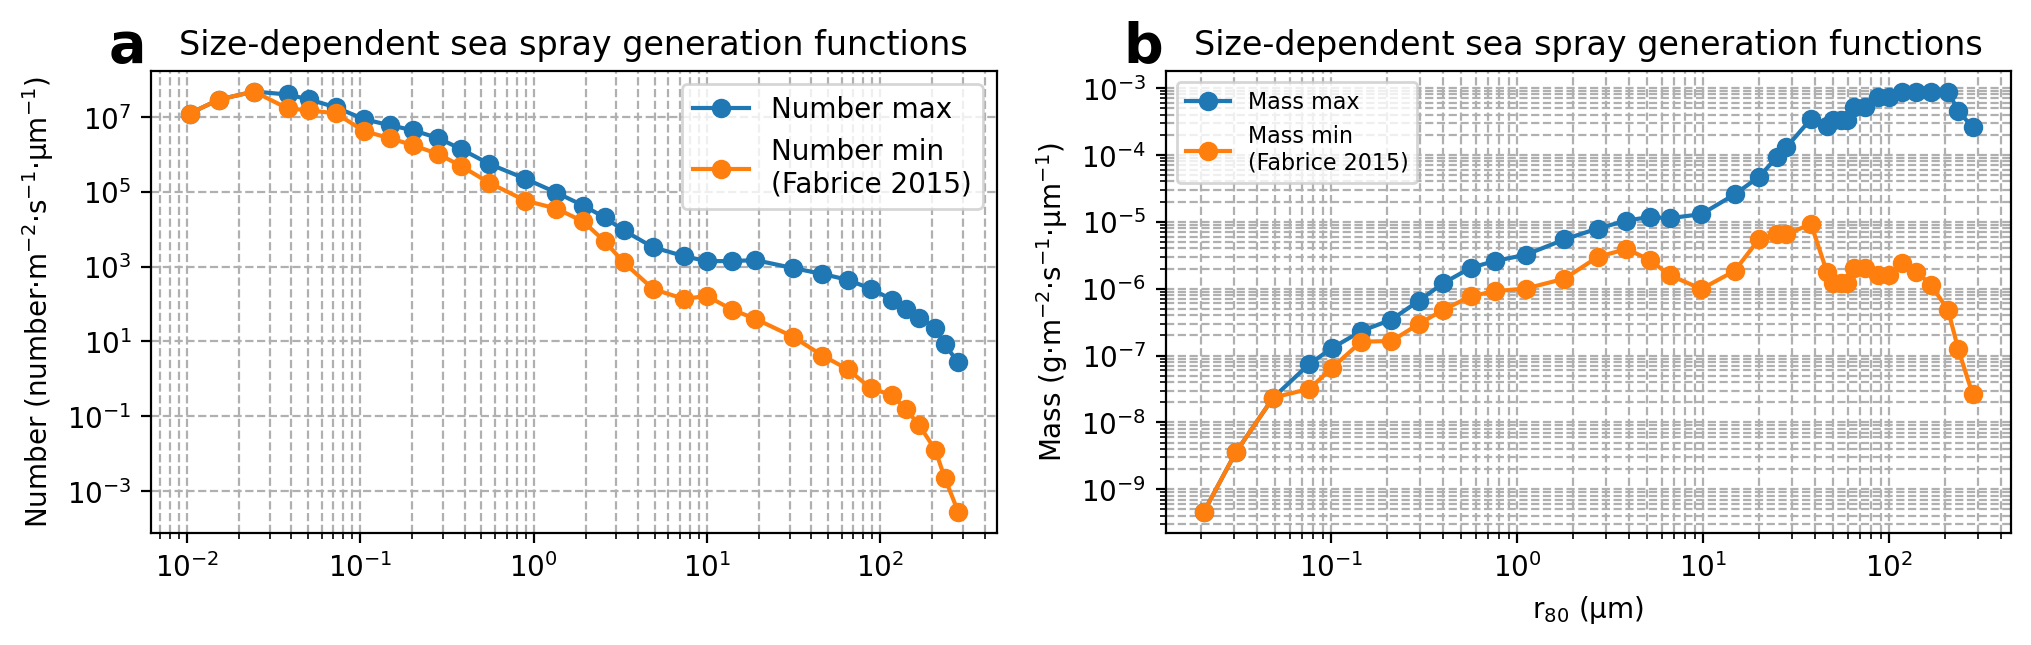

In [8]:
# data from https://www.annualreviews.org/doi/10.1146/annurev-fluid-010814-014651#
import matplotlib.pyplot as plt
import numpy as np
import string

# Provided x and y values


plt.figure(figsize=(12, 3),dpi=200)
plt.subplot(1, 2, 1)
# Convert the lists to NumPy arrays to allow for element-wise comparison
x_values_array = np.array(x)
y1_values_array = np.array(n_max)
y2_values_array = np.array(n_min)

# Plotting the log-log plot with the new integral range highlighted
plt.text(-0.05, 1.02, string.ascii_lowercase[0], transform=plt.gca().transAxes, 
           size=20, weight='bold')
plt.loglog(x_values_array, y1_values_array, 'o-', label='Number max')  # Log-log plot
plt.loglog(x_values_array, y2_values_array, 'o-', label=f'Number min\n(Fabrice 2015)')  # Log-log plot
plt.grid(True, which="both", ls="--")
plt.ylabel('Number (number·m$^{-2}$·s$^{-1}$·μm$^{-1}$)')
plt.title('Size-dependent sea spray generation functions')
plt.legend()

plt.subplot(1, 2, 2)

# Convert the lists to NumPy arrays to allow for element-wise comparison
x_values_array = np.array([i/4 for i in d])
y_values_array = np.array(m_max)
z_values_array = np.array(m_min)

# Plotting the log-log plot with the new integral range highlighted
plt.loglog([i/2 for i in d], m_max, 'o-',label='Mass max')  # Log-log plot
plt.loglog([i/2 for i in d], m_min, 'o-',label=f'Mass min\n(Fabrice 2015)')  # Log-log plot

plt.text(-0.05, 1.02, string.ascii_lowercase[1], transform=plt.gca().transAxes, 
           size=20, weight='bold')


plt.grid(True, which="both", ls="--")
plt.xlabel('r$_{80}$ (μm)')
plt.ylabel('Mass (g·m$^{-2}$·s$^{-1}$·μm$^{-1}$)')
plt.title('Size-dependent sea spray generation functions')

plt.legend(fontsize=8)
plt.show()

In [12]:
new_range_mask = (x_values_array >= 70) & (x_values_array <= 100)
new_x_values = x_values_array[new_range_mask]
new_y_values = y_values_array[new_range_mask]
new_integral = np.trapz(new_y_values, new_x_values)
print(f'd$_{0}$ < 100 μm\n{new_integral:.4f}'+r'g·m$^{-2}$·s$^{-1}$')
ew_range_mask = (x_values_array >= 1e-2) & (x_values_array <= 40)
new_x_values = x_values_array[ew_range_mask]
new_y_values = y_values_array[ew_range_mask]
ew_integral = np.trapz(new_y_values, new_x_values)
print(r'r$_{80}$ < 10 μm'+f'\n{ew_integral:.4f}'+r'g·m$^{-2}$·s$^{-1}$')


d$_0$ < 100 μm
0.0073g·m$^{-2}$·s$^{-1}$
r$_{80}$ < 10 μm
0.0008g·m$^{-2}$·s$^{-1}$


In [ ]:
r80<30μm

In [1]:
data='''
0.010363439	5.81E-11
0.015347813	4.46E-10
0.024411637	2.94E-09
0.038141287	6.65E-09
0.050748868	1.22E-08
0.072521222	2.46E-08
0.105500815	3.18E-08
0.148095764	5.98E-08
0.20059753	1.06E-07
0.281586872	1.76E-07
0.381412875	2.20E-07
0.554863359	2.63E-07
0.898438537	4.28E-07
1.354512277	6.81E-07
1.935627151	8.97E-07
2.57544757	9.08E-07
3.30658617	8.04E-07
4.896914041	8.72E-07
7.382731164	1.72E-06
10	3.28E-06
12.5	6.23E-06
14.03740473	8.54E-06
19.01383704	2.21E-05
30	6.01E-05
46.41588834	1.34E-04
50	1.64E-04'''
r80 = []
m_mean= []
# 分割字符串，获取每行的数据
for line in data.strip().splitlines():
    # 对每行进行进一步分割以获取x和y的值
    r_v,m_mean_v = line.split()  # 这里假设数据项之间由空格分隔
    r80.append(float(r_v))  # 转换为适当的数值类型
    m_mean.append(float(m_mean_v))

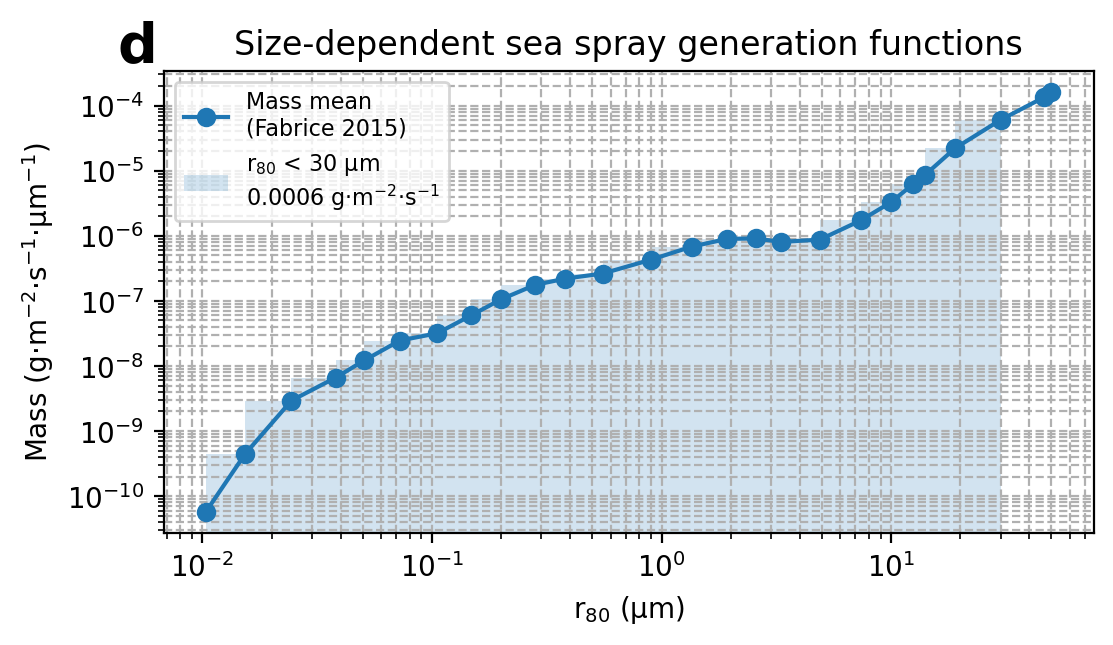

In [3]:
# data from https://www.annualreviews.org/doi/10.1146/annurev-fluid-010814-014651#
import matplotlib.pyplot as plt
import numpy as np
import string

# Provided x and y values


plt.figure(figsize=(6, 3),dpi=200)


# Convert the lists to NumPy arrays to allow for element-wise comparison
x_values_array = np.array(r80)
y_values_array = np.array(m_mean)

# Plotting the log-log plot with the new integral range highlighted
plt.loglog(r80, m_mean, 'o-',label=f'Mass mean\n(Fabrice 2015)')  # Log-log plot
#plt.plot(r80, m_mean, 'o-',label=f'Mass mean\n(Fabrice 2015)')  # Log-log plot
#plt.yscale('log')
plt.text(-0.05, 1.02, string.ascii_lowercase[3], transform=plt.gca().transAxes, 
           size=20, weight='bold')

# Find the indices of the points that fall within the new range of 1e-2 to 1e2
new_range_mask = (x_values_array >= 0) & (x_values_array <= 30)
new_x_values = x_values_array[new_range_mask]
new_y_values = y_values_array[new_range_mask]
new_integral = np.trapz(new_y_values, new_x_values)
plt.fill_between(new_x_values, new_y_values, step="pre", alpha=0.2, label=r'r$_{80}$ < 30 μm'+f'\n{new_integral:.4f}'+r' g·m$^{-2}$·s$^{-1}$')

plt.grid(True, which="both", ls="--")
plt.xlabel('r$_{80}$ (μm)')
plt.ylabel('Mass (g·m$^{-2}$·s$^{-1}$·μm$^{-1}$)')
plt.title('Size-dependent sea spray generation functions')

plt.legend(fontsize=8)
plt.show()

In [ ]:
rinitial < 60μm

In [ ]:
#microplastic

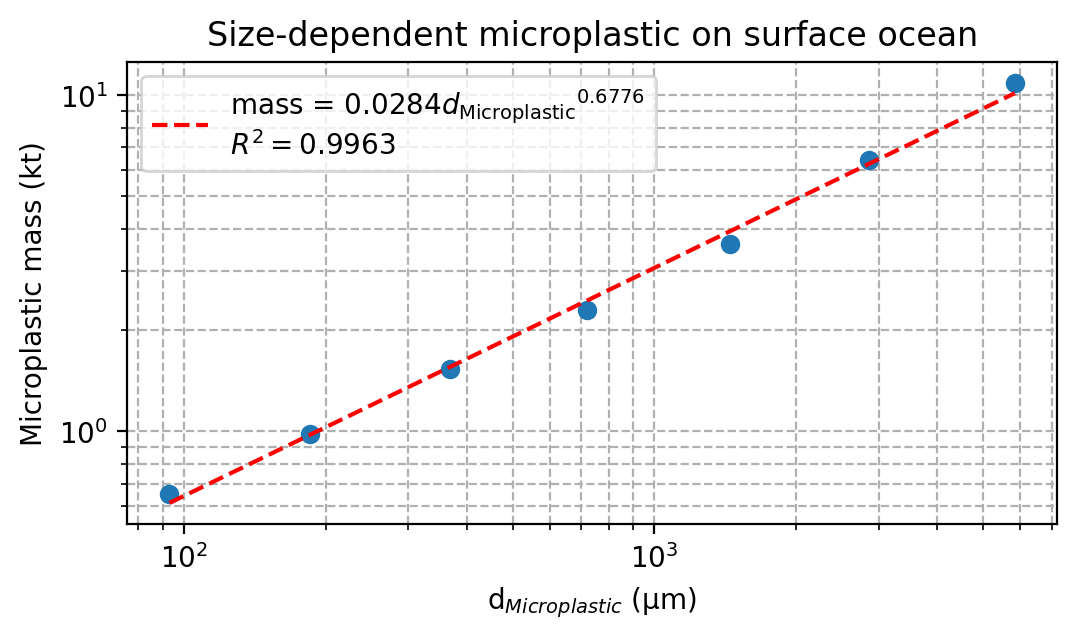

In [1]:
#https://doi.org/10.1038/s41561-023-01216-0 
# data from https://www.annualreviews.org/doi/10.1146/annurev-fluid-010814-014651#
import matplotlib.pyplot as plt
import numpy as np
import string
from scipy.optimize import curve_fit

microplastic='''
93.1	0.65
185	0.98
367	1.53
720	2.3
1450	3.6
2870	6.4
5850	10.87'''

d = []
m = []
# 分割字符串，获取每行的数据
for line in microplastic.strip().splitlines():
    # 对每行进行进一步分割以获取x和y的值
    d_values,m_values = line.split()  # 这里假设数据项之间由空格分隔
    d.append(float(d_values))  # 转换为适当的数值类型
    m.append(float(m_values))
    
y = 0.0284 * np.power(d, 0.6776)



plt.figure(figsize=(6, 3),dpi=200)

x_values_array = np.array(d)
y_values_array = np.array(m)


# Plotting the log-log plot with the new integral range highlighted
plt.loglog(x_values_array, y_values_array, 'o')  # Log-log plot
plt.plot(d, y, '--', label=r'mass = $0.0284d_{\mathrm{Microplastic}}$$^{0.6776}$' + '\n' + r'$R^2 = 0.9963$', color='red')
new_range_mask = (x_values_array <= 5000)
new_x_values = x_values_array[new_range_mask]
new_y_values = y_values_array[new_range_mask]
new_integral = np.trapz(new_y_values, new_x_values)

plt.grid(True, which="both", ls="--")
plt.xlabel('d$_{Microplastic}$ (μm)')
plt.ylabel('Microplastic mass (kt)')
plt.title('Size-dependent microplastic on surface ocean')
# Display the equation and R-squared on the plot

plt.legend()
plt.show()

In [ ]:
#梯形计算法则计算积分

In [6]:
import numpy as np
filtered_x = []
filtered_y = []
for i in range(len(d)):
    if 90 <= d[i] <= 100:
        filtered_x.append(d[i])
        filtered_y.append(m_max[i])
        print(m_max[i]) 
# Now we can use NumPy's trapz function to approximate the integral using the trapezoidal rule
integral_approximation = np.trapz(filtered_y, filtered_x)

integral_approximation

0.000267
0.000327


0.0021289623290100005

In [8]:
#对于不同粒径的（粒径参考见下文Fig15）SSA的flux SSAfluxbin（Tg/year）
SSA_d_bin=[0.79-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80,80-90,90-100]
#https://www.sciencedirect.com/science/article/pii/S0360132319302069
SSAbin_flux=[519296/0.026*i for i in[4.3228e-05,0.000111,0.000256,0.00047,0.00093,0.00093,0.0013,0.0013,0.00345,0.00327]]

In [11]:
sum(top3jet_flux)

4100.093866419889

In [3]:
#https://www.sciencedirect.com/science/article/pii/S0360132319302069
#不同粒径SSA中top3jet的mass占比
top3jetmass_percent=[2.017589057,6.407541827,3.042785762,4.830753419,3.042785762,2.81717695,0.821293038,0.722330677,1.372607819,1.372607819]

In [4]:
#(Tg/year)
top3jet_flux=[i*j/100 for i,j in zip(SSAbin_flux,top3jetmass_percent)]

In [5]:
#(Tg/year)
filmdrop_flux=[i-j for i,j in zip(SSAbin_flux,top3jet_flux)]

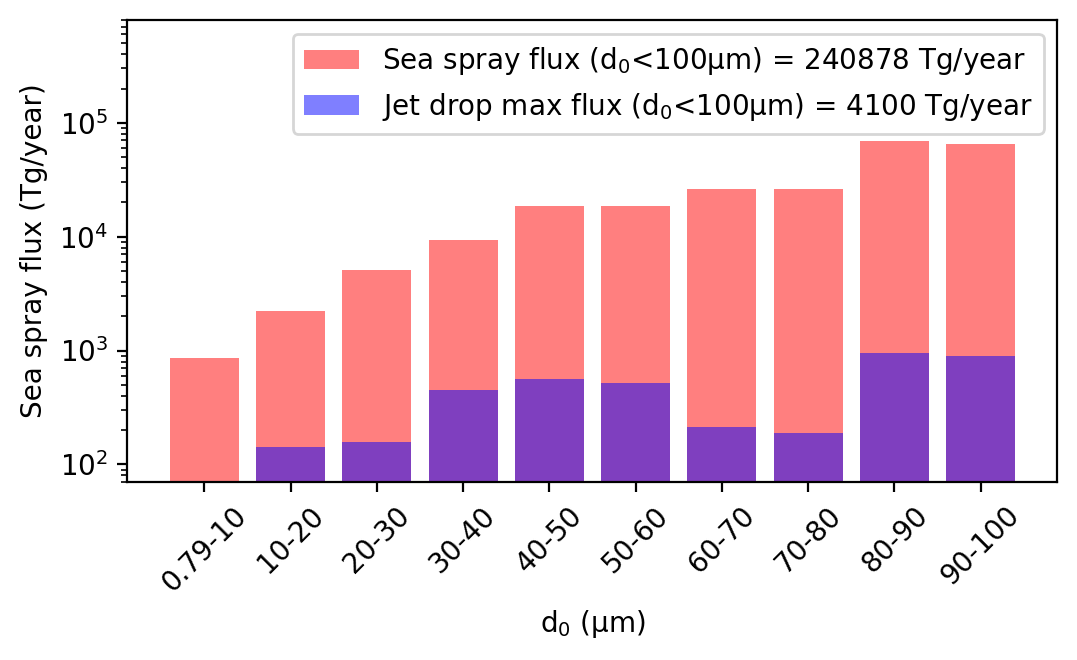

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3), dpi=200)
SSA_d_bin = ['0.79-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
# 绘制第一组柱状图，使用红色
plt.bar(SSA_d_bin, SSAbin_flux, color='red', alpha=0.5, label=r'Sea spray flux (d$_{0}$<100μm) = 240878 Tg/year')

# 绘制第二组柱状图，使用蓝色
plt.bar(SSA_d_bin, top3jet_flux, color='blue', alpha=0.5, label='Jet drop max flux (d$_{0}$<100μm) = 4100 Tg/year')
plt.yscale('log')
plt.ylim(70,8e5)
plt.xlabel('d$_{0}$ (μm)')
plt.ylabel('Sea spray flux (Tg/year)')
plt.xticks(rotation=45)  # 旋转 x 轴刻度标签 45 度
plt.legend()  # 添加图例
plt.show()


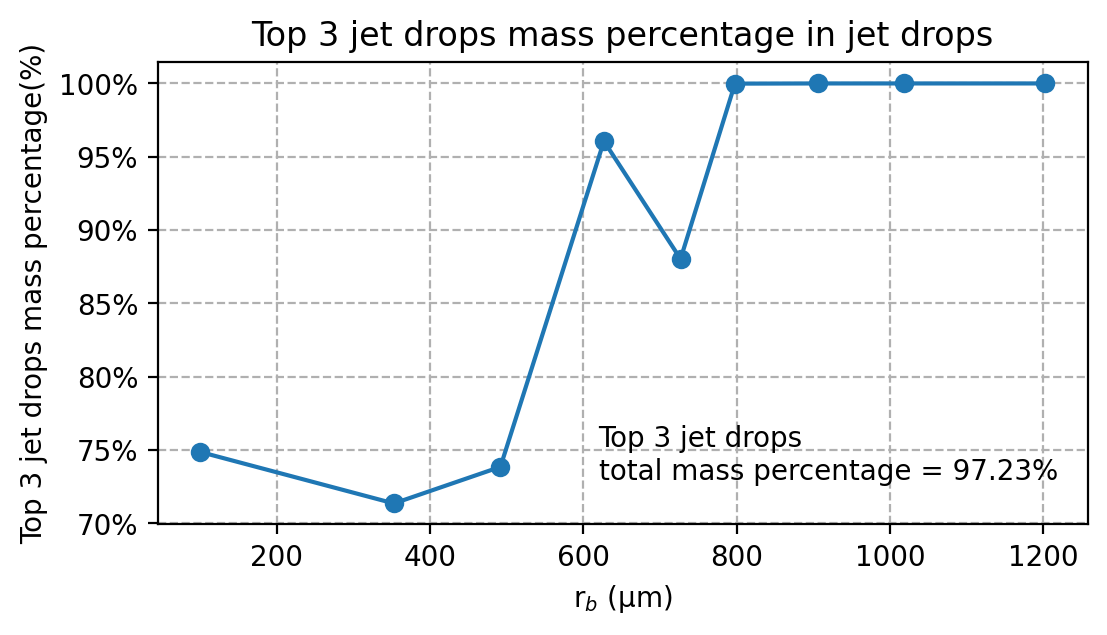

In [39]:
# top 3 jet 占 总 jet 的 质量比


import matplotlib.pyplot as plt
import numpy as np
import string
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker

rb=[100,353,492,627,727,798,906,1018,1203]
percentage=[0.748717484,0.713557779,0.738509936,0.960629307,0.880298154,0.999878223,0.999997123,1,1]


plt.figure(figsize=(6, 3),dpi=200)

plt.plot(rb, percentage, 'o-')  # Log-log plot

def percentage(percentage, pos):
    return '{:.0f}%'.format(percentage * 100)

formatter = ticker.FuncFormatter(percentage)
plt.gca().yaxis.set_major_formatter(formatter)

plt.text(620, 0.73, f'Top 3 jet drops\ntotal mass percentage = 97.23%')

plt.grid(True, which="both", ls="--")
plt.xlabel('r$_{b}$ (μm)')
plt.ylabel('Top 3 jet drops mass percentage(%)')
plt.title('Top 3 jet drops mass percentage in jet drops')
# Display the equation and R-squared on the plot
plt.show()


In [ ]:
# EF and MP-flux

In [6]:
#把微塑料分尺寸
MP_sizebin=['<0.1','0.1-10','10-20','20-30','','','','','','']
EF_TJD=[30000,3e4,3e4,3e4,3e4,0]

ocean_mass=3.6e14*1/1000 #m2*m/1000=kt
jet_flux=27202 #TG/year flux来源于Analysis and quantification of the diversities of aerosol life cycleswithin AeroCom 和 ocean spray
MP_mass_seasurface=sum([0.0011,0.0115,0.0624,0.0597,0.3961,1.8443])  #表面一米 kt #来源于Brahney
# 计算 MP_flux
MP_flux = [EF_TJD * (MP_mass_seasurface / ocean_mass) * jet_flux]  # TG
MP_flux

[0.00538395585]

In [10]:
EF_TJD=100
ocean_mass=3.6e14*1/1000 #m2*m/1000=kt
jet_flux=1570947 #TG/year flux来源于Analysis and quantification of the diversities of aerosol life cycleswithin AeroCom 和 ocean spray
MP_mass_seasurface=sum([0.0011,0.0115,0.0624,0.0597,0.3961,1.8443])  #表面一米 kt #来源于Brahney
# 计算 MP_flux
MP_flux = [EF_TJD * (MP_mass_seasurface / ocean_mass) * jet_flux]  # TG
MP_flux 

[0.00103643228325]

In [14]:
#Oh≲ 0.03 when Rb > 15 μm https://doi.org/10.1103/physrevlett.130.054001
#jet drop can only be produced: Rb of 15 μm - 2.5 mm, 5626–5634. https://doi.org/10.1021/acs.nanolett.2c01102
#Rb>100μm ：R <100 μm 气泡 不会产生jet drop https://www.nature.com/articles/ncomms1369
#δ=0.0036(1-(Oh/0.031)0.5)3Rb https://doi.org/10.1021/acs.nanolett.2c01102
#EFTJD reaches its peak when Rp is approximately equal to δ,https://doi.org/10.1126/science.170.3958.626
#EFTJD is highest when H is 100 mm https://doi.org/10.1080/02786829008959446
Oh=[0.003,0.008] #min max μm
Rb=[100,1203] #min max μm
h=0.0036*(1-(Oh[0]/0.031)**0.5)**3*Rb[1] #膜厚度 https://doi.org/10.1021/acs.nanolett.2c01102
h

1.416002725590015

In [ ]:
#所以0.04287<h≲1.42 μm

In [11]:
#又 h=0.0036*rd**3/0.22/Rb**2
#rd=0.0337*Rb**1.208
h=0.0036*(0.0337*Rb[1]**1.208)**3/0.22/Rb[1]**2
h

0.0629681452750953

In [15]:
EF_max_nano=423*0.1*0.22**3*100000/(0.0238*100**2.486)
EF_max_nano

20.185125445452456

In [23]:
423*10*100000/((1-(0.003/0.31)**0.5)**3*10000)

57711.30655697419

In [19]:
(1-(0.003/0.31)**0.5)**3

0.7329586267162446